# Introduction

For my capstone, I'll be working with a dataset pertaining to the Portuguese 'Vinho Verde' wine. The dataset is split into separate data files for white and red wine. Each file contains various chemical estimators for different bottles of Vinho Verde, along with a quality score for each, which is presumably determined by a tasting panel.

The specific variables are as follows:
    
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol <br>
12. **output variable: quality (score between 0 and 10)**

We'll start by getting to know the data a bit better.

# Initial Data Exploration and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

white = pd.read_csv("winequality-white.csv",sep=';')
red = pd.read_csv("winequality-red.csv",sep=';')

In [183]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
print('Null Counts:')
print(white.isnull().sum())
#print('\n')
print('\nObservations in the white wine data set: {}'.format(white.shape[0]))
print('Observations in the red wine data set: {}'.format(red.shape[0]))
print('\nPreview of the white wine table:')
white.head()

Null Counts:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observations in the white wine data set: 4898
Observations in the red wine data set: 1599

Preview of the white wine table:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


From a quick look at the dataset, we can tell the following:
    - All variables are numeric, but they vary tremendously in their scales
    - There is no missing data (which is nice for a change!)
    - We have notably more data in the white wine data table
    
Let's look at some additional visualizations to help further our understanding of the data.
    - A pairgrid, including histograms, KDE plots, and scatter plots for each variable pairing
    - A correlation heatmap, to further illuminate the degree to which our variables are correlated with one another (or not)
    - QQ plots for each variable, to help determine the degree of normality in their distributions

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


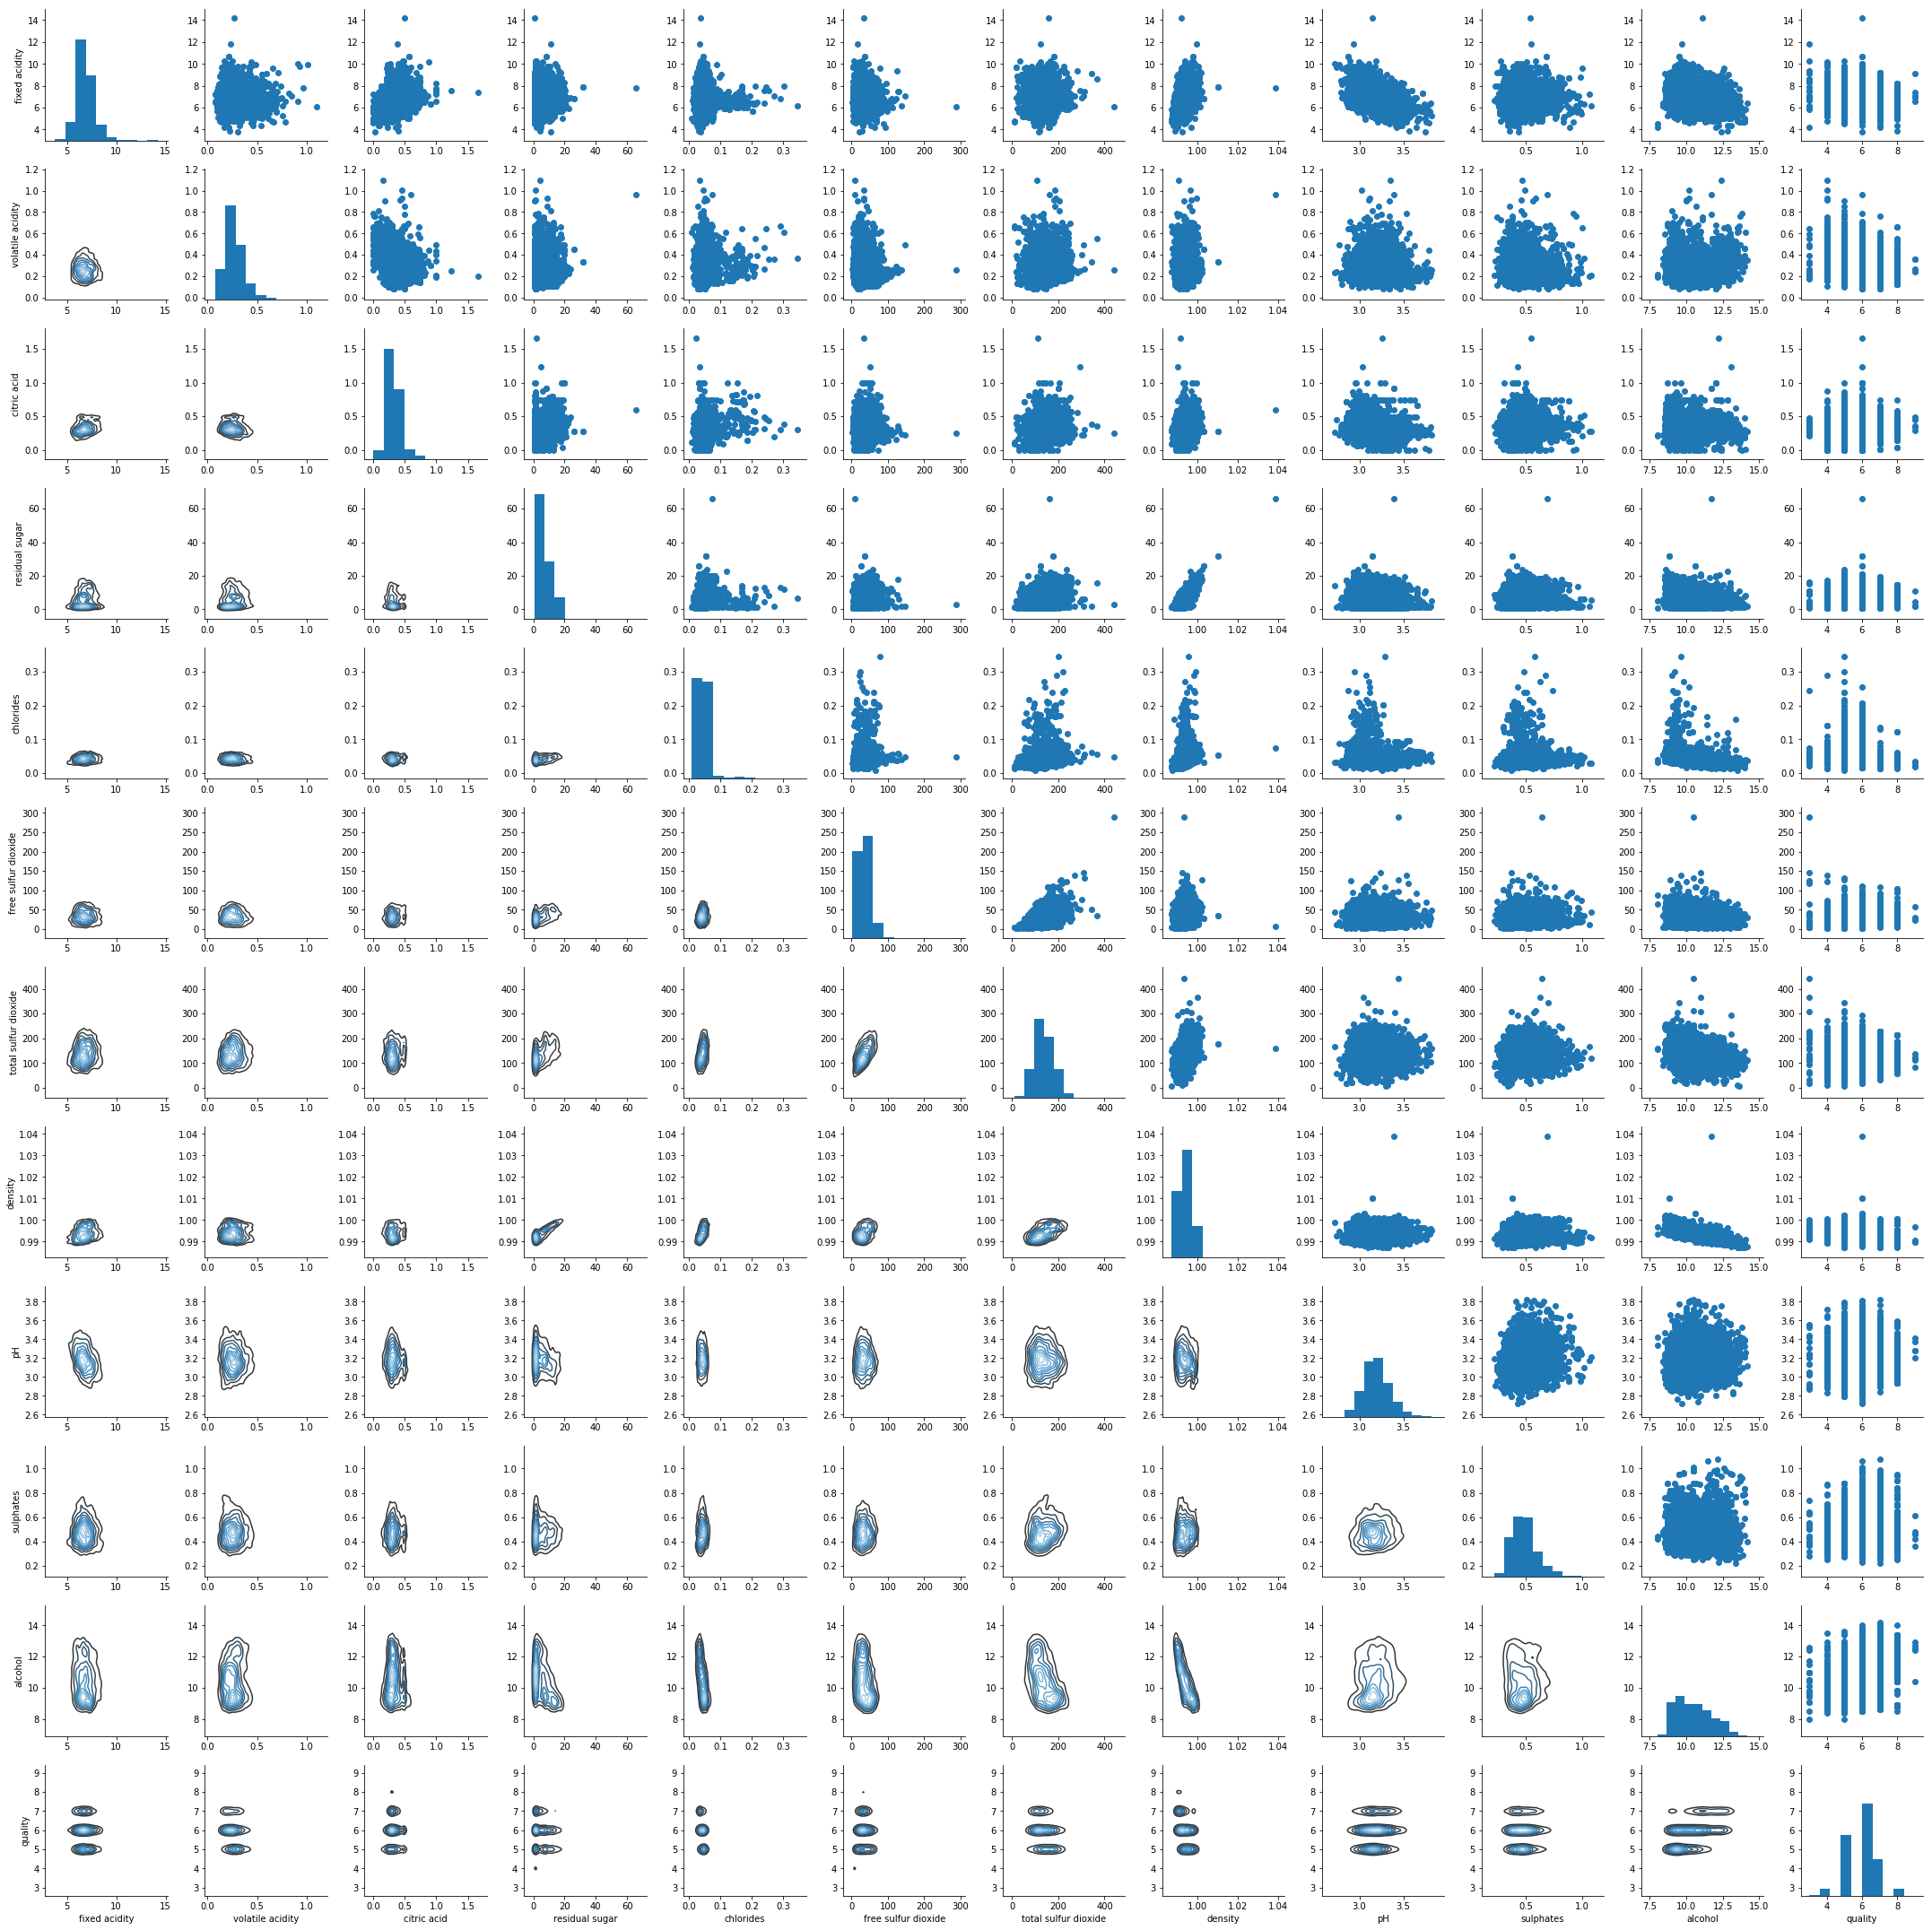

In [28]:
g = sns.PairGrid(white)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(plt.hist, lw=3)
plt.title("PairGrid: White Wine Data")
plt.show()

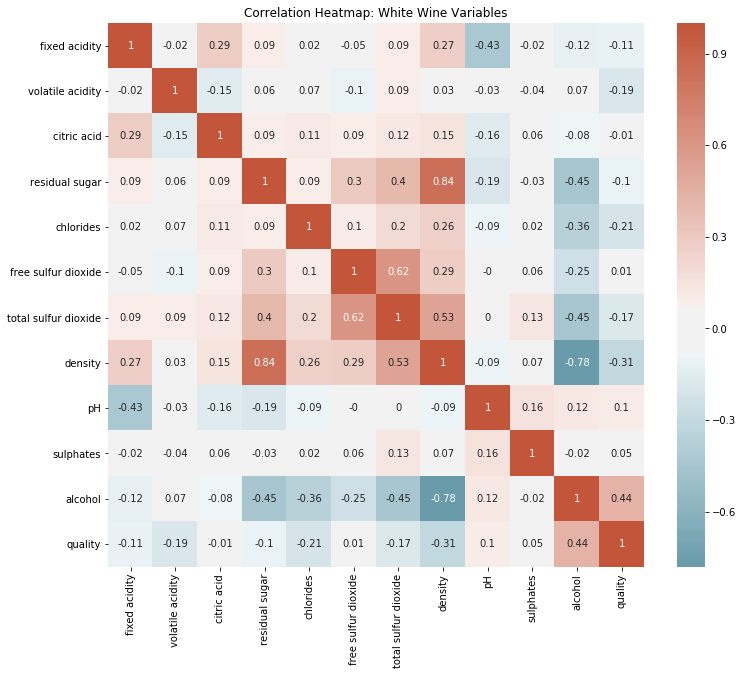

In [194]:
# Calculating correlations
correlations = np.round(white.corr(),2)

# Displaying heatmap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
h = plt.figure(figsize=(12,10))
h = sns.heatmap(correlations,annot=True,cmap=cmap,center=0)
plt.title("Correlation Heatmap: White Wine Variables")
plt.savefig("heatmap")
plt.show()

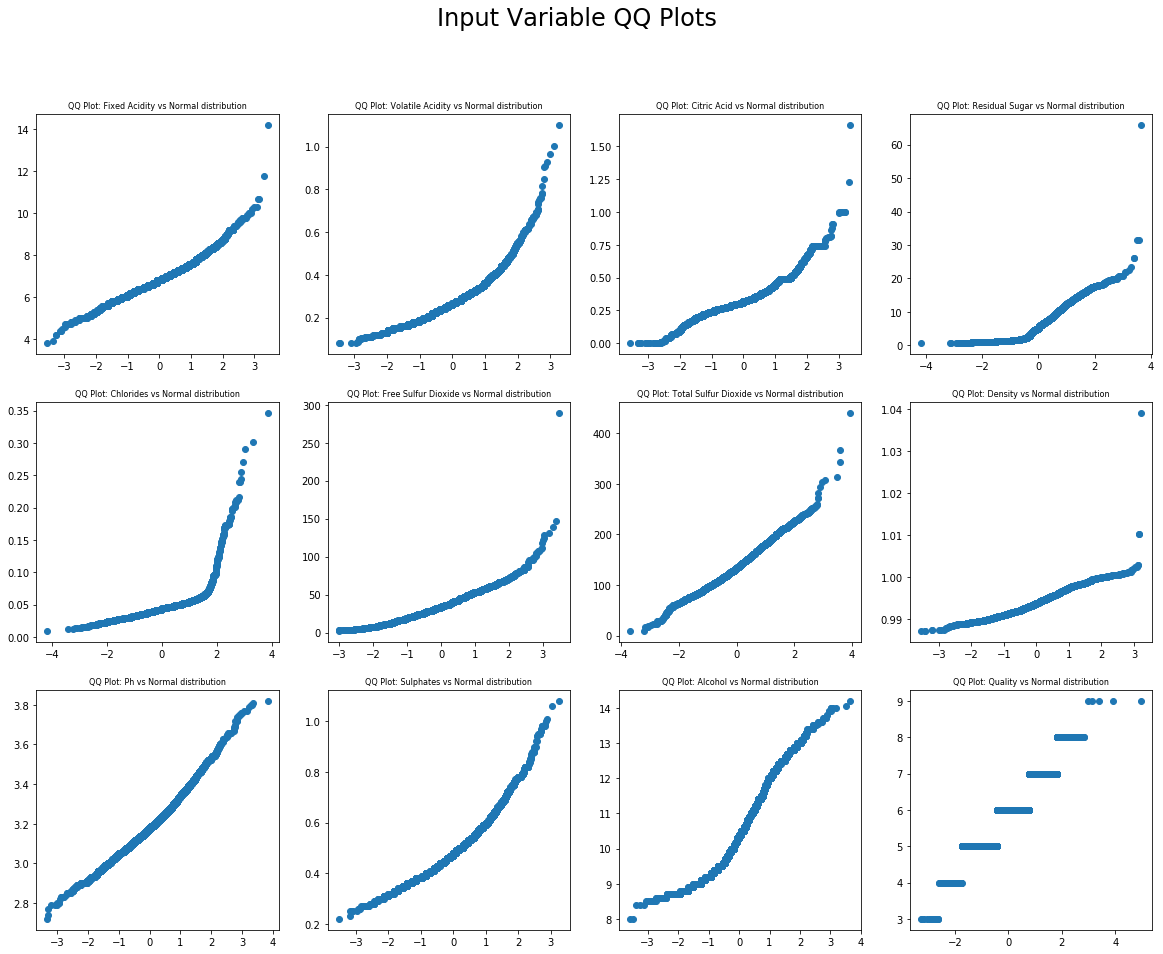

In [201]:
# QQ plots for each variable to assess normality
white_wine_variables = white.columns
number_of_plots = len(white_wine_variables)
current_plot_number = 1
plot_rows = 3

h = plt.figure(figsize=(20, 15))

for variable in white_wine_variables:
    plt.subplot(plot_rows, math.ceil(number_of_plots/plot_rows), current_plot_number)
            
    sorted_vars = white[variable].sort_values()
    normal_distribution = np.random.normal(0, 1, len(white[variable]))
    normal_distribution.sort()
    
    #Create the QQ plot
    plt.plot(normal_distribution, sorted_vars, "o",)
    plt.title("QQ Plot: {} vs Normal distribution".format(variable.title()),fontsize=8)
    
    current_plot_number += 1
    
plt.suptitle("Input Variable QQ Plots",fontsize=24)
plt.savefig("qqplots")

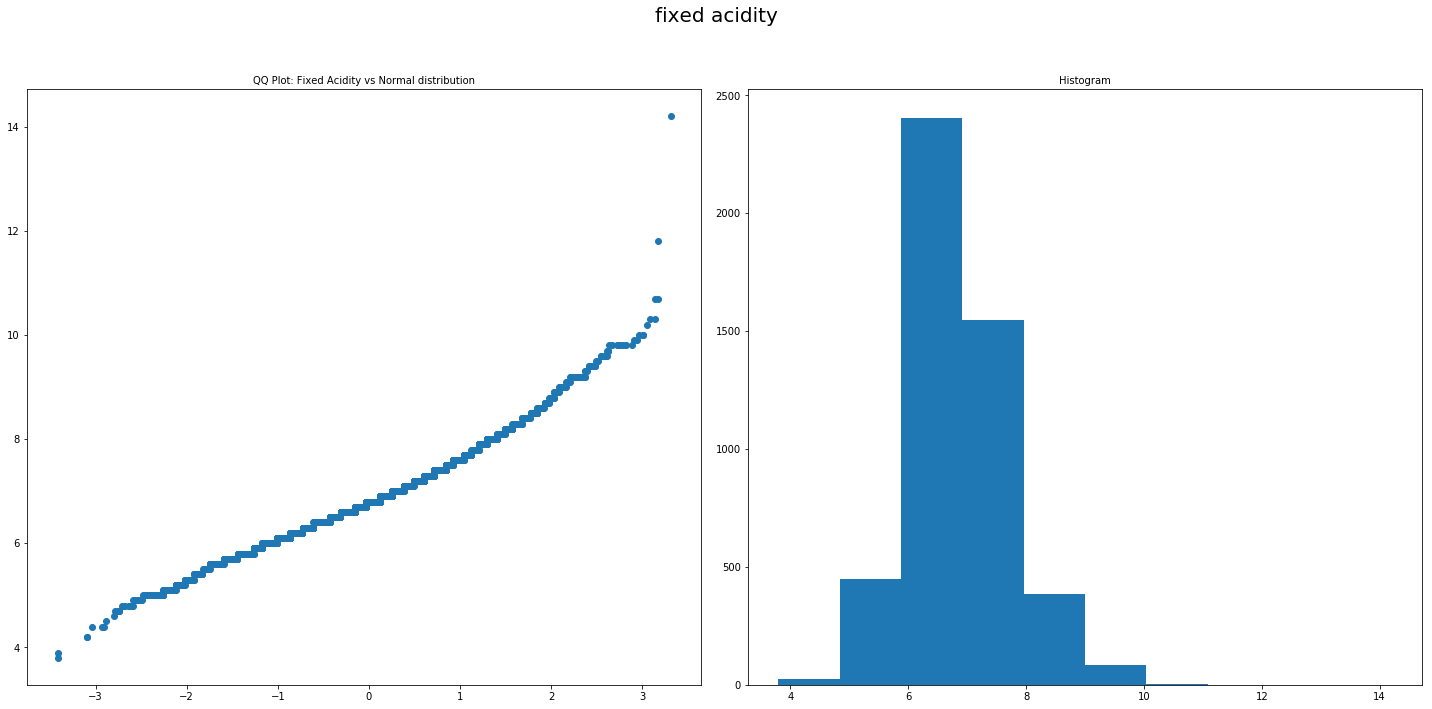

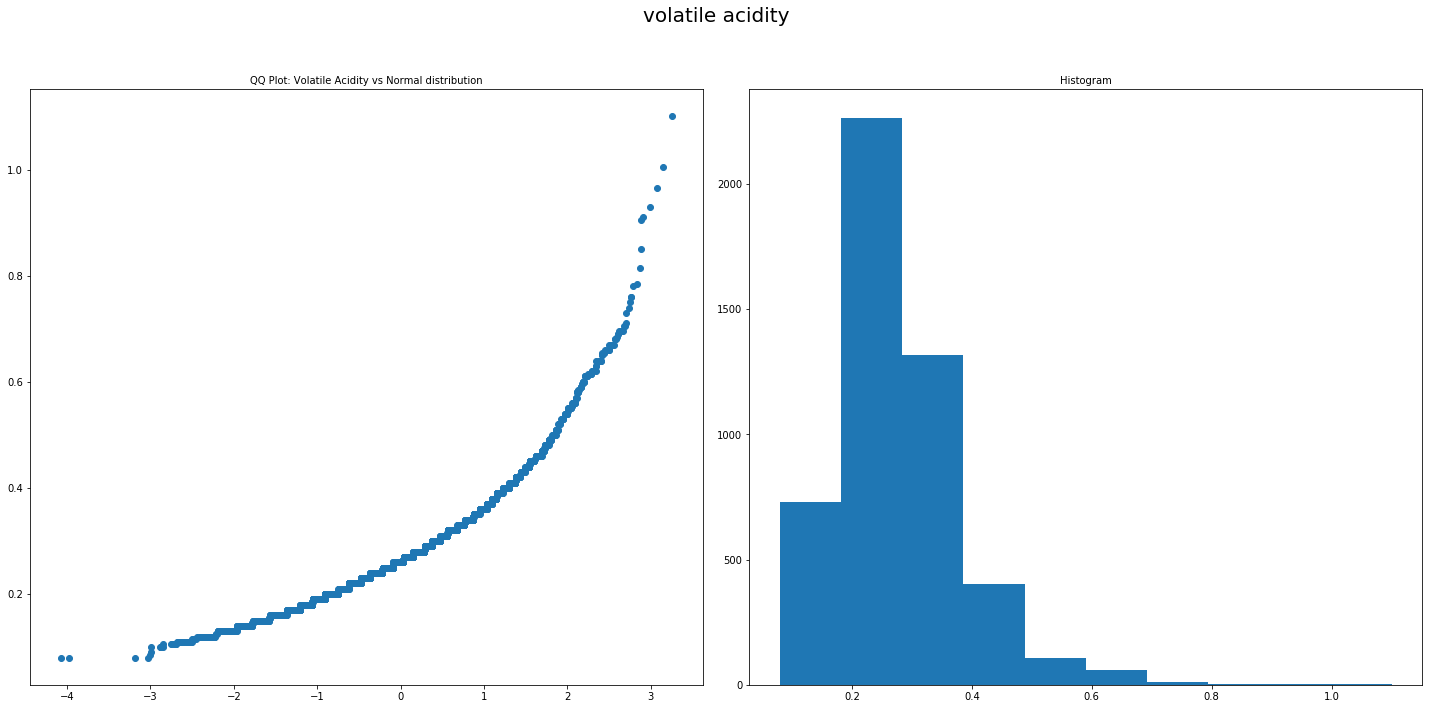

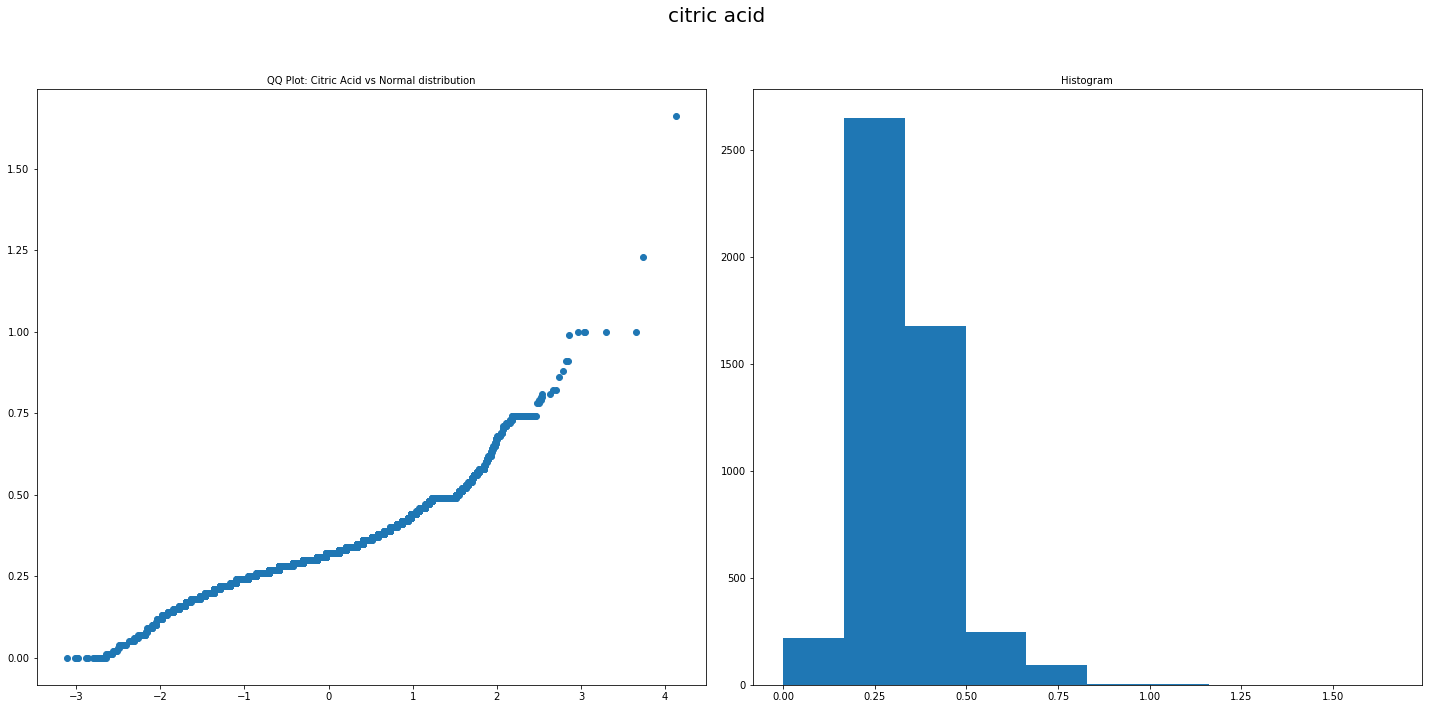

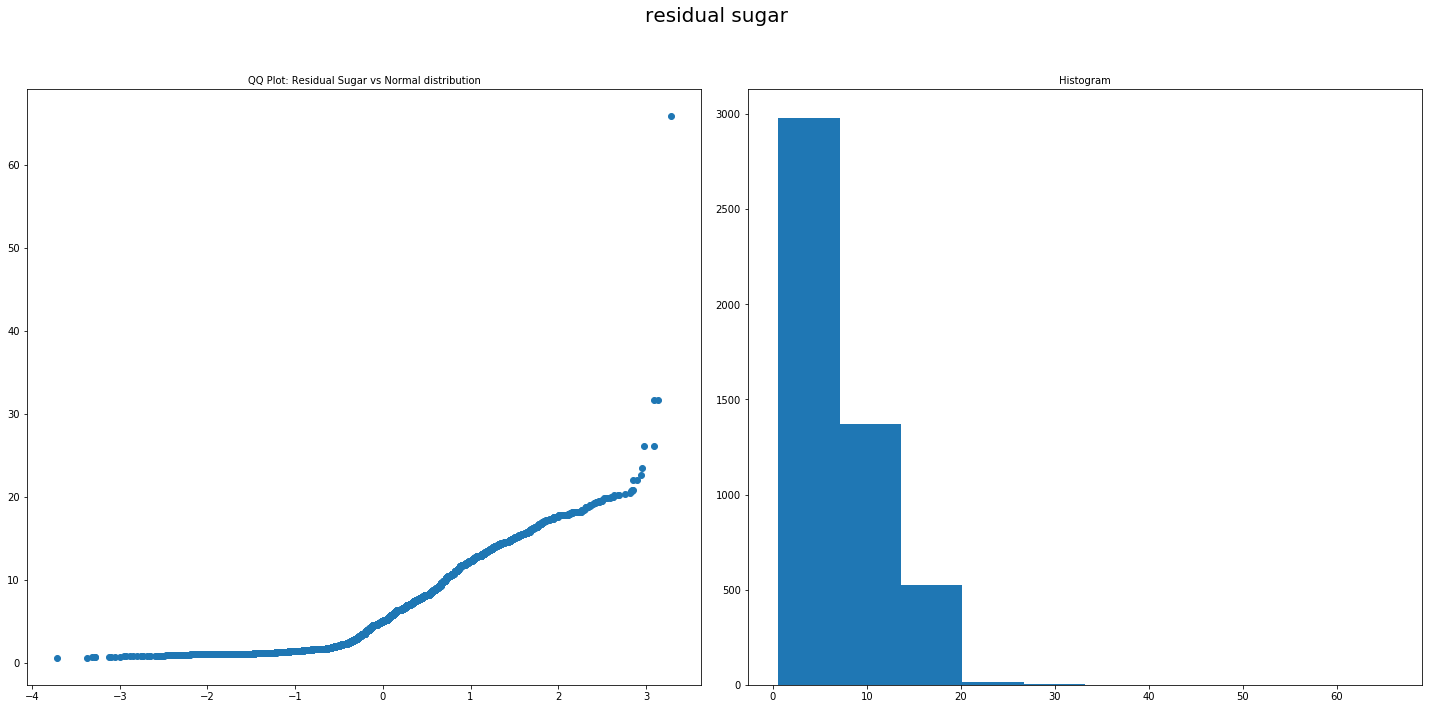

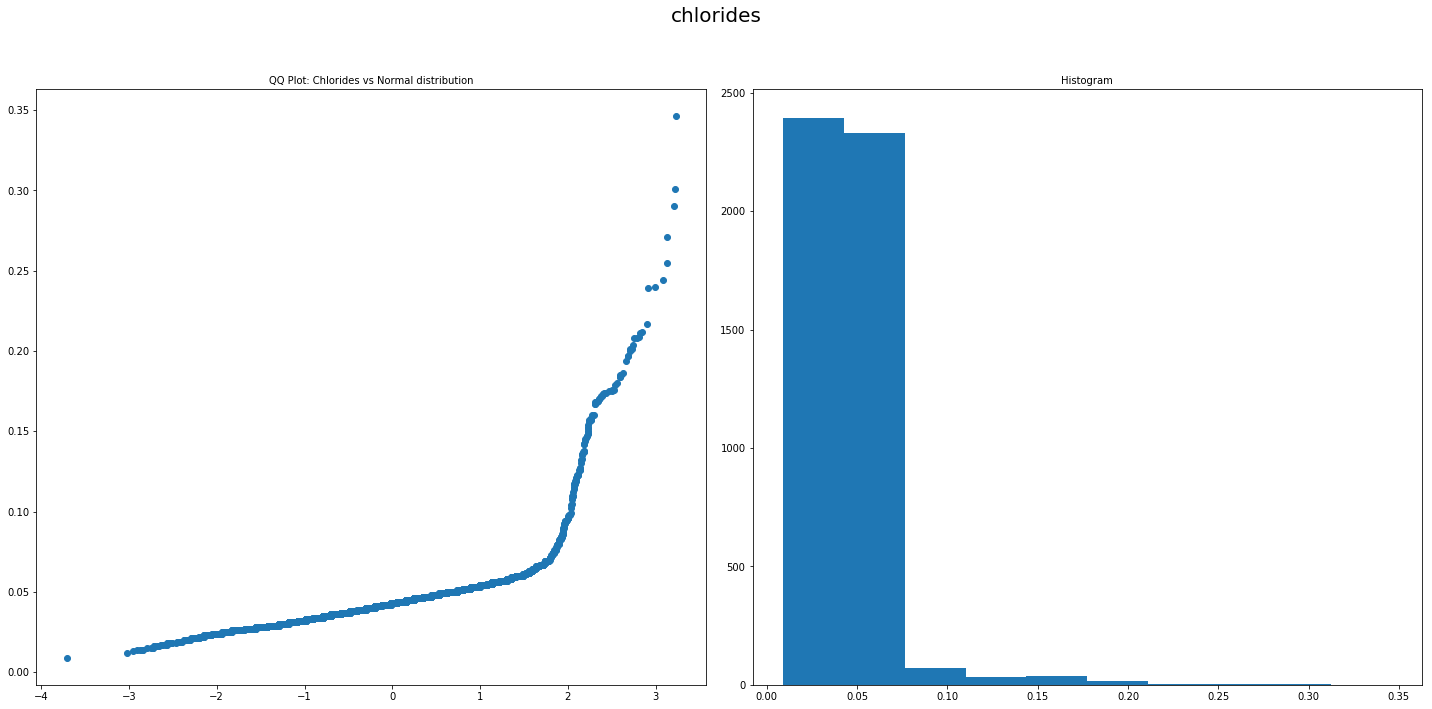

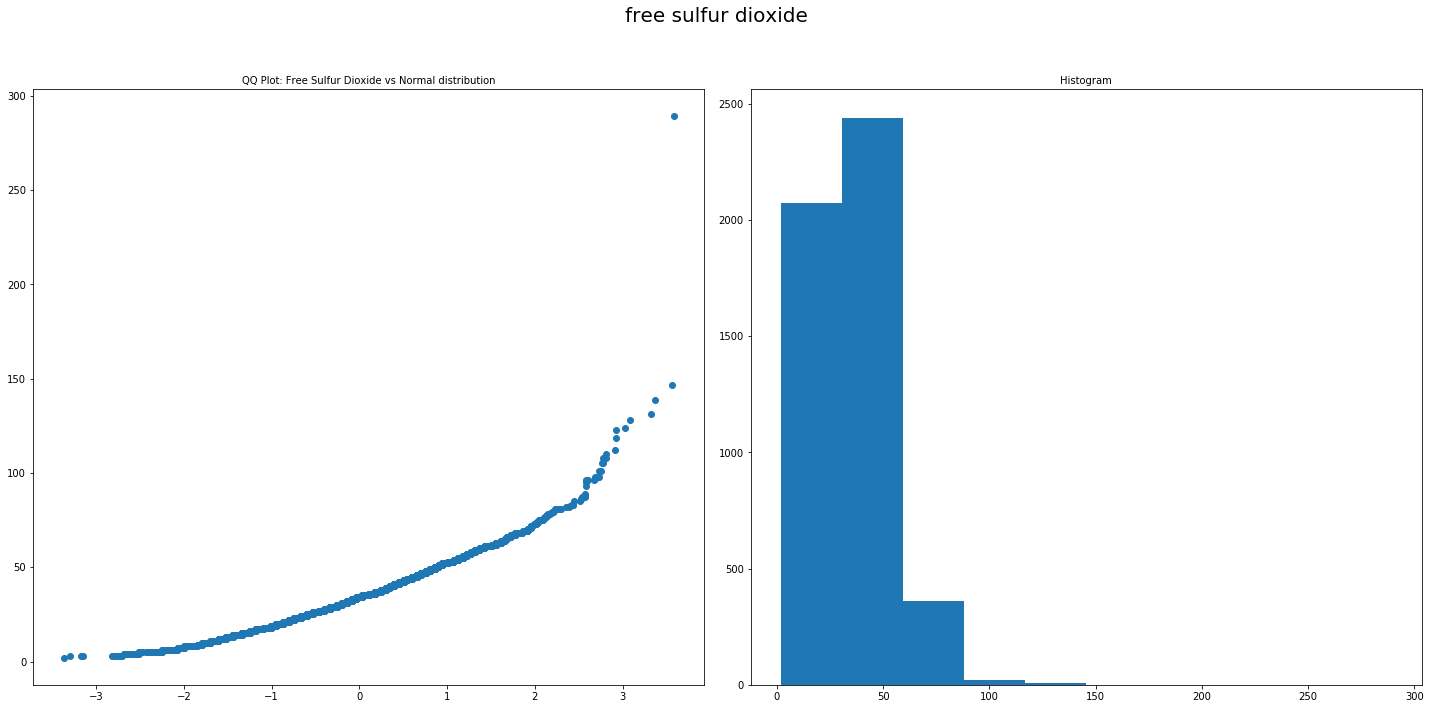

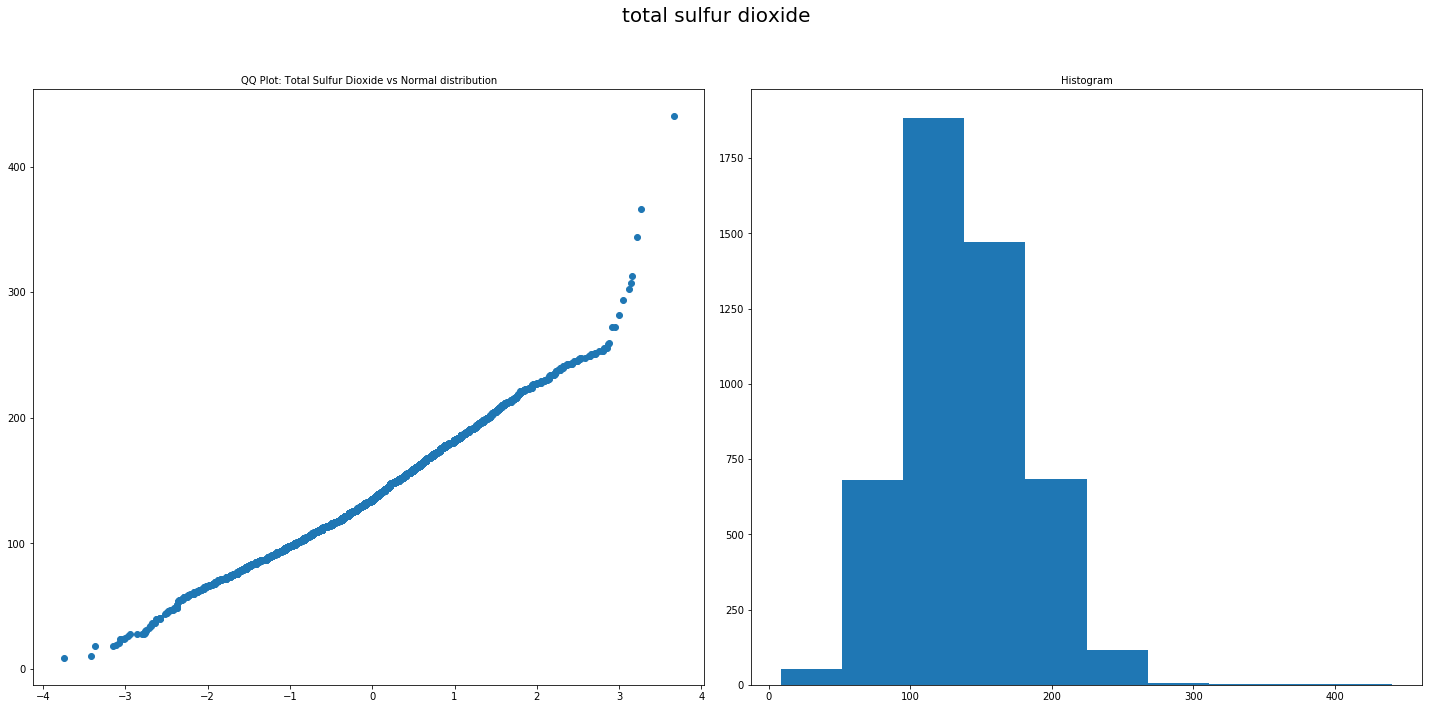

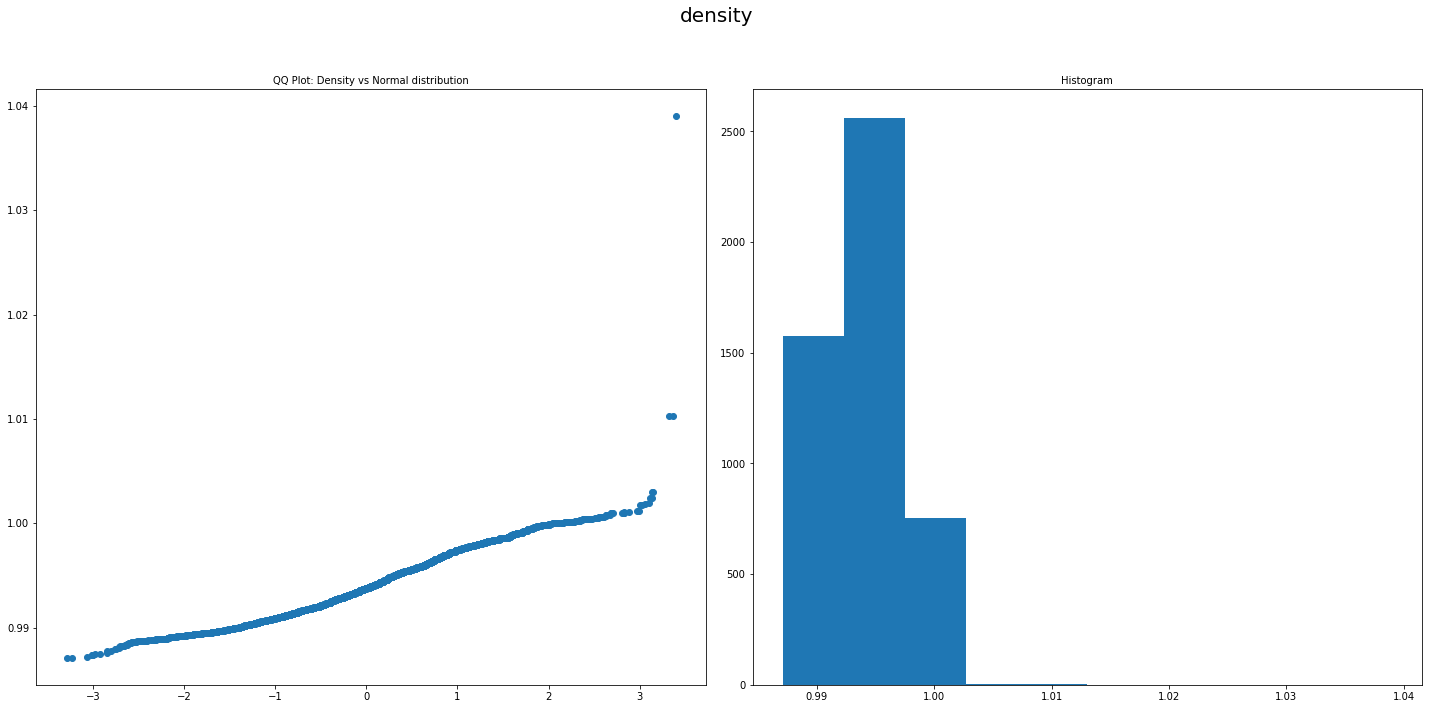

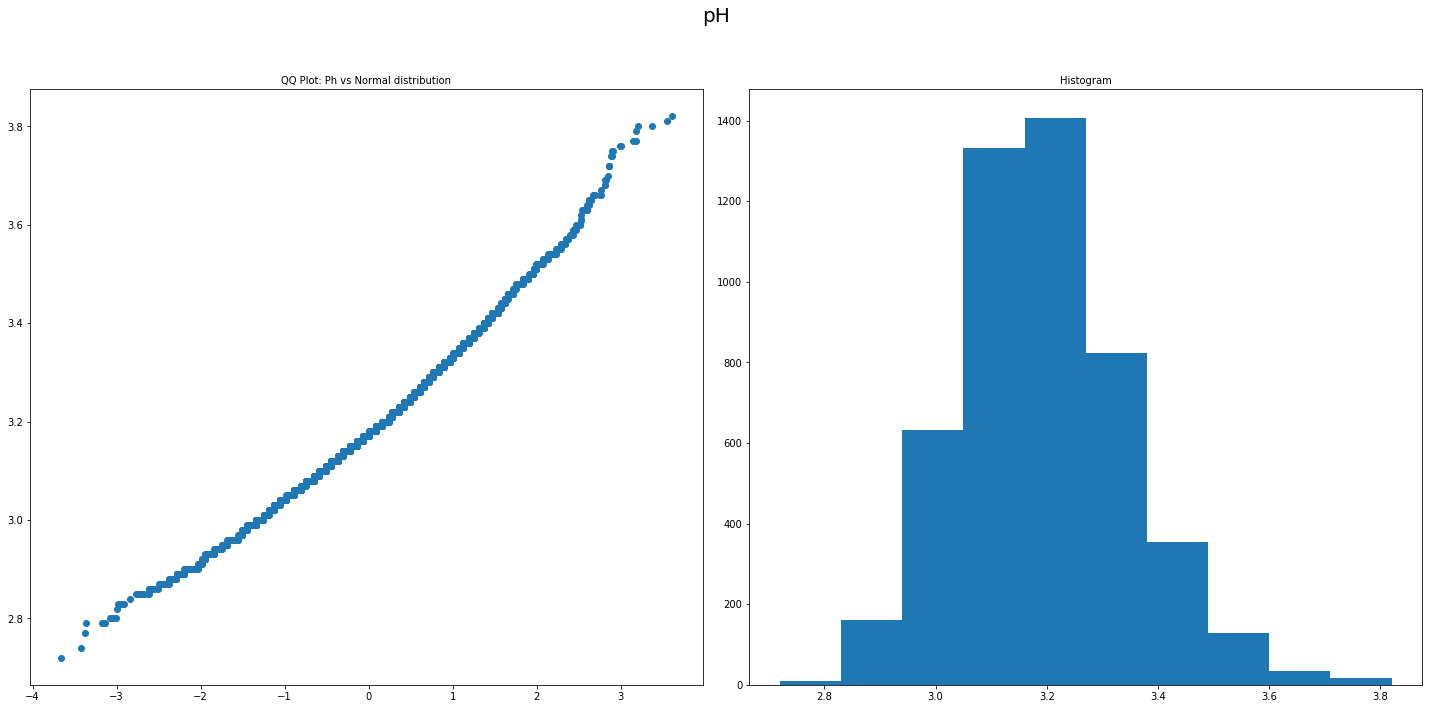

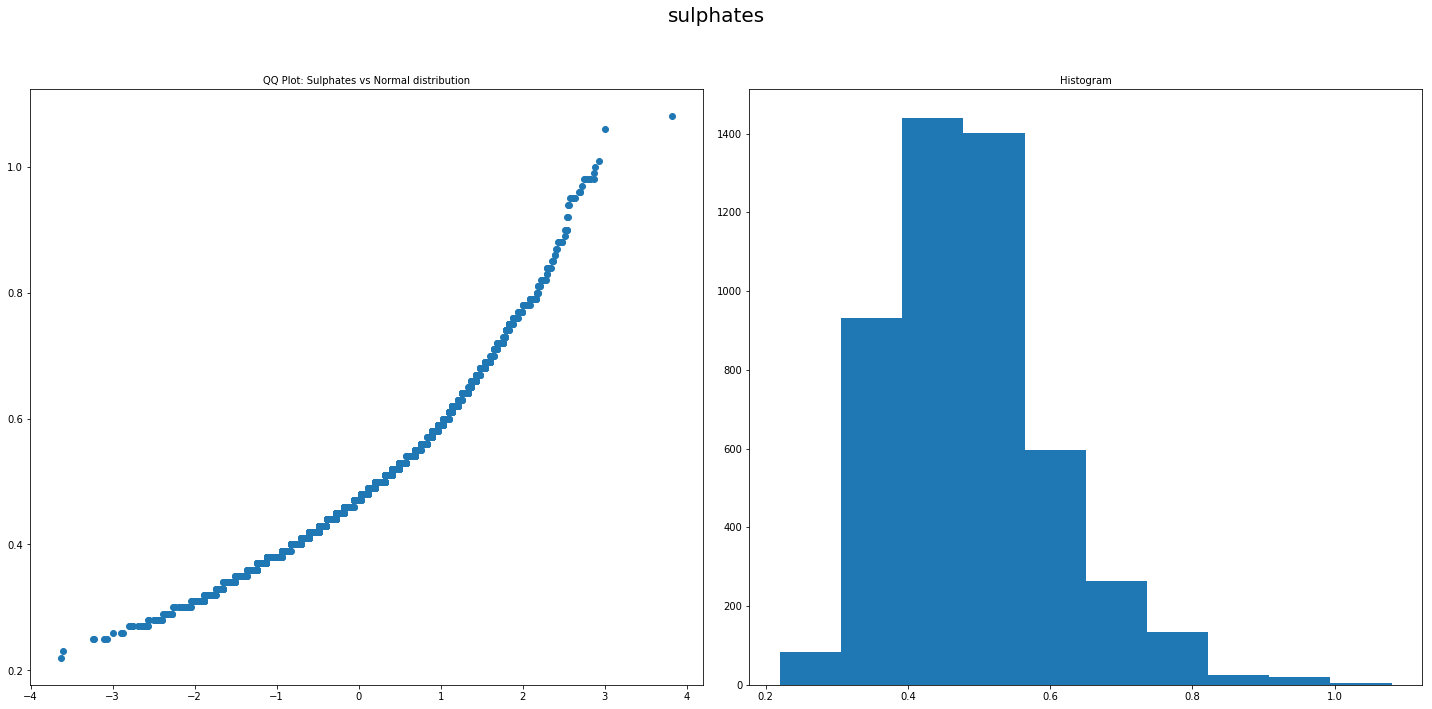

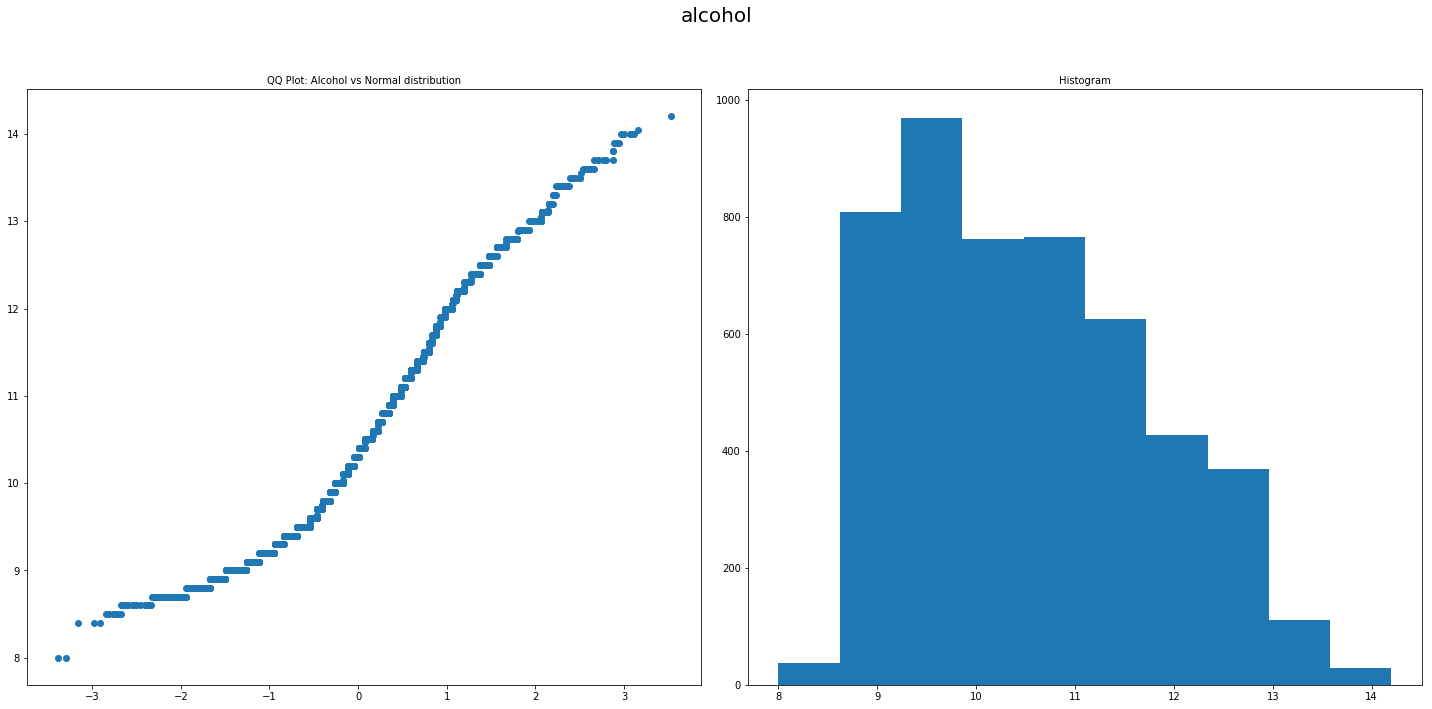

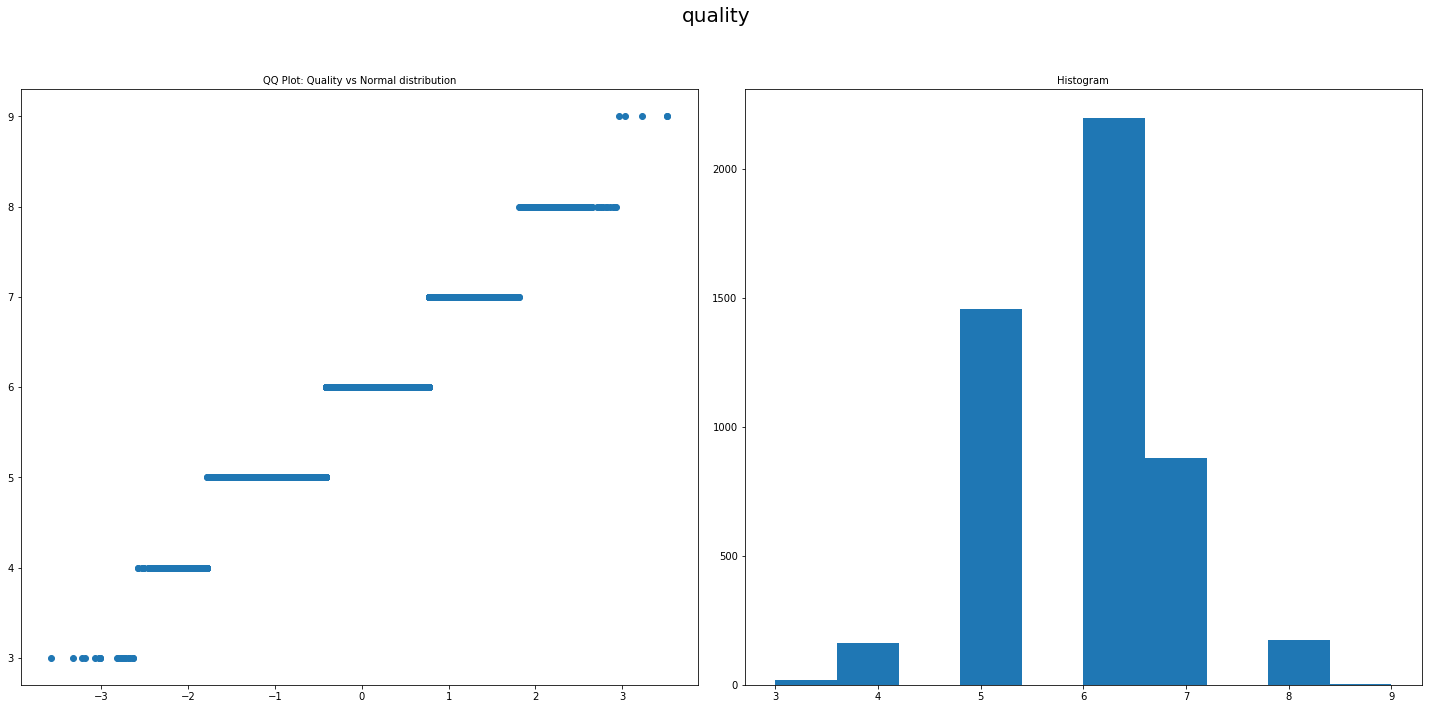

In [33]:
# QQ plots for each variable to assess normality
white_wine_variables = white.columns
number_of_plots = 2*len(white_wine_variables)
current_plot_number = 1
plot_rows = len(white_wine_variables)

for variable in white_wine_variables:
    
    plt.figure(figsize=(20,10))

    plt.suptitle(variable,fontsize=20)
    sorted_vars = white[variable].sort_values()
    normal_distribution = np.random.normal(0, 1, len(white[variable]))
    normal_distribution.sort()
    
    #QQ Plot
    #plt.figtext(0.5,current_plot_number/number_of_plots,variable)
    plt.subplot(1,2,1)
    plt.plot(normal_distribution, sorted_vars, "o",)
    plt.title("QQ Plot: {} vs Normal distribution".format(variable.title()),fontsize=10)
    
    current_plot_number += 1
    
    #Histogram
    plt.subplot(1,2,2)
    plt.hist(white[variable])
    plt.title("Histogram")
    
    current_plot_number += 1
    
    plt.tight_layout(rect=[0,0, 1, 0.9])
    plt.show()
    
    #h.tight_layout(rect=[0, 0.0, , 1])
    #h.subplots_adjust() 
    #plt.subplot_tool()
    #plt.show()

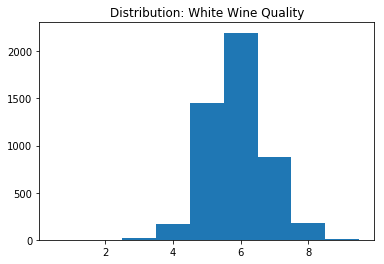

In [5]:
plt.hist(white['quality'],bins=np.arange(1,11,1),align='left')
plt.title("Distribution: White Wine Quality")
plt.savefig("quality_histogram")

We learn a lot from the above visualizations, including:
- While all of the input variables are continuous floats, the outcome variable is technically discrete. We'll have to address later whether this means we want to approach this dataset as a regression or classification question.
- The variables are not all independent from one another, including a few that have rather strong correlations with one another. This will have to be taken into consideration if we use certain modeling approaches, like Naive Bayes or logistic regression.
    - Density and residual sugar are highly correlated
    - Density and alcohol have a fairly strong negative correlation
- Only a few of the variables, like ph, acidity, and maybe density seem to have a relatively normal distribution.
- Most of the variables have notable outliers, particularly on the high end of their distributions.

# Modeling Approach
There's a few points we need to consider before we start modeling in order to measure success. 

The first is whether we'd like to consider this a regression or classification problem. Technically, since the outcome variable is discrete, we could treat each rating as a distinct category to be classified. However, since we're interested in the extent to which we can model accurate numerical predictions, a regression could be equally valid. They both have their drawbacks and their advantages when it comes to the issue at hand. For example, a classification model is capable of having very small residuals if it is quite accurate, because it will guess the quality value exactly. Certain classification models also come with probabilities assigned to the likelihood of each category, which could be useful. Additionally, they may not be as susceptible as regressions to outliers depending on the loss function used to fit it.

Regressions, on the other hand, may produce more accurate numerical approximations by treating the variable as continuous. If we don't care about producing the exact correct discrete integer necessarily, this could be preferable.

Since it's hard to know now which will produce optimal results, we'll try some of each. It is, however, necessary to define what "optimal" is. I will be striving to create a model that produces the best and most consistent values for:
    - Rounded accuracy - the percentage of the time that the prediction is correct, using the rounded figure in the case of a regression
    - Root mean squared error - to estimate, in general, how right or wrong our predictions are.

Let's start by establishing a baseline for model performance. To do so, we'll simply use a model that predicts the mode outcome (quality of 6). Let's calculate its key metrics:

In [112]:
base_accuracy = white['quality'].value_counts().iloc[0]/white['quality'].value_counts().sum()
print('base_accuracy: {}'.format(base_accuracy))

# Since we're assuming an unbiased estimator, RMSE = STD of distribution
base_rmse = white['quality'].std()
print('base_rmse: {}'.format(base_rmse))

base_accuracy: 0.44875459371171905
base_rmse: 0.8856385749678454


In [113]:
# Storing the above in a dataframe for future comparison to other models
model_results = pd.DataFrame(columns=['Accuracy Std Dev','Mean Accuracy','RMSE Std Dev','RMSE'])

baseline_addition = [None,base_accuracy,None,base_rmse]
model_results.loc['Baseline'] = baseline_addition

In [ ]:
# Defining the split we'll use, with data shuffled in case the data is ordered in a way we're not aware of/that is biased
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

Let's start with some classification models.

## KNN

In [5]:
# Scaling all variables to a standard
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_variables_df = pd.DataFrame(min_max_scaler.fit_transform(white.drop('quality',axis=1)))
scaled_variables_df.columns=white.drop('quality',axis=1).columns

X, Y = scaled_variables_df, white['quality']

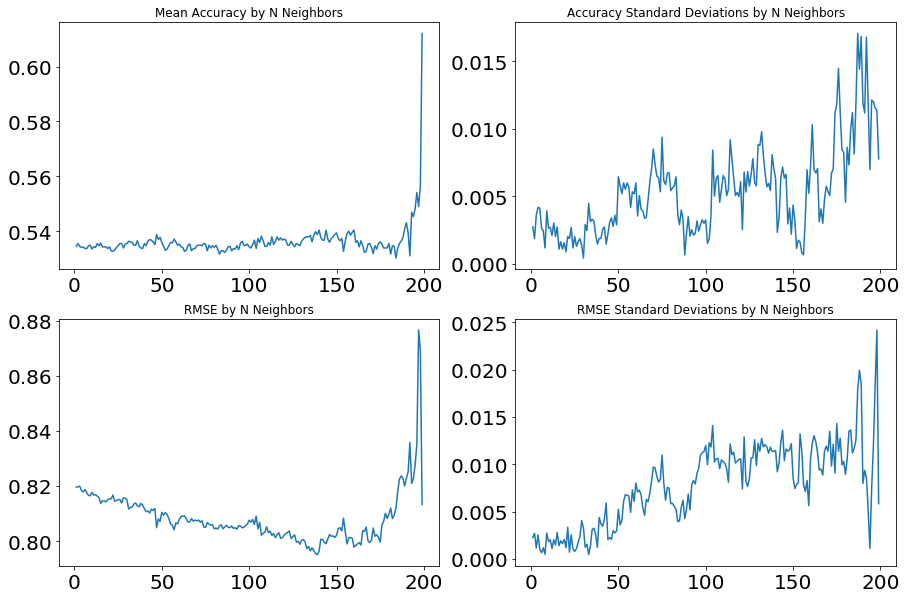

In [305]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
min_max_scaler = preprocessing.MinMaxScaler()
scaled_variables_df = pd.DataFrame(min_max_scaler.fit_transform(white.drop('quality',axis=1)))
scaled_variables_df.columns=white.drop('quality',axis=1).columns

X, Y = scaled_variables_df, white['quality']

num_neighbors = np.arange(1,200)
mean_accuracies, accuracy_stds, rmse_values, rmse_stds = (np.array([]) for i in range(4))

# Running KNN models for each number of neighbors possible, storing key metrics
for neighbors in num_neighbors:
    KNNC = KNeighborsClassifier(n_neighbors=neighbors)
    
    accuracies = cross_val_score(KNNC,X,Y,scoring='accuracy',cv=kf)
    nmse = cross_val_score(KNNC,X,Y,scoring='neg_mean_squared_error',cv=kf)
    rmse = np.sqrt(np.abs(nmse))
    
    mean_accuracies = np.append(accuracies.mean(),mean_accuracies)
    accuracy_stds = np.append(accuracies.std(),accuracy_stds)
    rmse_values = np.append(rmse.mean(),rmse_values)
    rmse_stds = np.append(rmse.std(),rmse_stds)

# Plotting the result
h = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.title("Mean Accuracy by N Neighbors")
plt.plot(num_neighbors,mean_accuracies)
plt.subplot(222)
plt.title("Accuracy Standard Deviations by N Neighbors")
plt.plot(num_neighbors,accuracy_stds)
plt.subplot(223)
plt.title("RMSE by N Neighbors")
plt.plot(num_neighbors,rmse_values)
plt.subplot(224)
plt.title("RMSE Standard Deviations by N Neighbors")
plt.plot(num_neighbors,rmse_stds)

plt.show()

In [ ]:
#Same as above, but with distance
num_neighbors = np.arange(1,200)
mean_accuracies, accuracy_stds, rmse_values, rmse_stds = (np.array([]) for i in range(4))

X, Y = scaled_variables_df, white['quality']

# Running KNN models for each number of neighbors possible, storing key metrics
for neighbors in num_neighbors:
    KNNC = KNeighborsClassifier(n_neighbors=neighbors,weights='distance')
    
    accuracies = cross_val_score(KNNC,X,Y,scoring='accuracy',cv=kf)
    nmse = cross_val_score(KNNC,X,Y,scoring='neg_mean_squared_error',cv=kf)
    rmse = np.sqrt(np.abs(nmse))
    
    mean_accuracies = np.append(accuracies.mean(),mean_accuracies)
    accuracy_stds = np.append(accuracies.std(),accuracy_stds)
    rmse_values = np.append(rmse.mean(),rmse_values)
    rmse_stds = np.append(rmse.std(),rmse_stds)

# Plotting the result
h = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.title("Mean Accuracy by N Neighbors",fontsize=20)
plt.plot(num_neighbors,mean_accuracies)
plt.subplot(222)
plt.title("Accuracy Standard Deviations by N Neighbors")
plt.plot(num_neighbors,accuracy_stds)
plt.subplot(223)
plt.title("RMSE by N Neighbors")
plt.plot(num_neighbors,rmse_values)
plt.subplot(224)
plt.title("RMSE Standard Deviations by N Neighbors")
plt.plot(num_neighbors,rmse_stds)
plt.tick_params(labelsize=14)

plt.savefig("knnneighbors")
plt.show()

In [331]:
knn_results = pd.DataFrame({'n_neighbors':num_neighbors,'mean_accuracies':mean_accuracies,'accuracy_stds':accuracy_stds,'rmse_values':rmse_values,'rmse_stds':rmse_stds})

In [332]:
knn_results.sort_values('mean_accuracies',ascending=False).head(100)

,accuracy_stds,mean_accuracies,n_neighbors,rmse_stds,rmse_values
101,0.001182,0.665374,102,0.007760,0.693950
105,0.001925,0.665170,106,0.006732,0.693224
107,0.002946,0.664966,108,0.006331,0.692933
102,0.002474,0.664558,103,0.008275,0.695560
104,0.001798,0.664149,105,0.005631,0.694558
103,0.002016,0.664149,104,0.009482,0.695104
98,0.001262,0.663741,99,0.008758,0.695408
109,0.002474,0.663333,110,0.004742,0.694270
99,0.001512,0.663332,100,0.008913,0.695699
106,0.003425,0.662925,107,0.004550,0.693977


In [333]:
from sklearn.neighbors import KNeighborsClassifier

KNNC = KNeighborsClassifier(n_neighbors=101,weights='distance')

X, Y = scaled_variables_df, white['quality']

mean_accuracies, accuracy_stds, rmse_values, rmse_stds = (np.array([]) for i in range(4))
    
accuracies = cross_val_score(KNNC,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(KNNC,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.6637405242766631
Standard Deviation of Accuracies: 0.0012616507241346752
Mean Root Means Squared Error: 0.6954079287541539
Standard Deviation of Root Means Squared Errors: 0.008757775574085736


In [334]:
# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X, Y = scaled_variables_df, white['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = KNNC.fit(Xtrain,Ytrain)
    predictions = KNNC.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.6637405242766631
Standard Deviation of Accuracies: 0.0012616507241346752
Mean Root Means Squared Error: 0.6954079287541539
Standard Deviation of Root Means Squared Errors: 0.008757775574085736


In [336]:
# Storing key metrics in a DF for comparison to other models later
knn_addition = [accuracy_std,mean_accuracy,rmse_std,rmse_mean,None,None]
#knn_addition = [0.017489,0.525128,0.017424,0.820487]
model_results.loc['KNN'] = knn_addition

In [337]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Baseline,NaN,0.448755,NaN,0.885639,0.000000,0.000000
KNN,0.001262,0.663741,0.008758,0.695408,NaN,NaN
Naive Bayes,0.005478,0.448756,0.006650,0.893898,0.000002,0.009326
Random Forest,0.008960,0.634559,0.019236,0.738758,0.185804,-0.165847
Gradient Boosted Classifier,0.007118,0.543080,0.006170,0.802049,0.094326,-0.094383
SVM Classifier,0.004338,0.503063,0.008253,0.849744,0.054308,-0.040530
Linear Regression,0.002965,0.518477,0.011319,0.754978,0.069722,-0.147533
Ridge Regression,0.000947,0.517934,0.009575,0.689207,0.069179,-0.221797
Lasso Regression,0.009736,0.449477,0.009575,0.689207,0.000722,-0.221797
SVM Regressor,0.002121,0.550020,0.008560,0.745437,0.101266,-0.158306


Key takeaways from the KNN classification:
- The optimal version of the KNN classification recommends a pretty high number of neighbors (45), which produces both the highest accuracy and lowest RMSE, with relative consistency between cross validation folds.
- This being said, the accuracy is just over 52%, and the root mean squared error is 0.82. These represent improvements over the baseline of ~8% and ~7%, respectively.

# Naive Bayes

In [205]:
# Let's try combining the correlated features
winsorized_2 = winsorized.copy()
means = winsorized[['residual sugar','density']].mean(axis=0)
stds = winsorized[['residual sugar','density']].std(axis=0)
winsorized['density_sugar_combo'] = ((winsorized[['residual sugar','density']] - means) / stds).mean(axis=1)
winsorized['density_sugar_combo'] = min_max_scaler.fit_transform(winsorized[['density_sugar_combo']])

In [168]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()

#X, Y = scaled_variables_df, white['quality']
X, Y = winsorized_2, white['quality']

accuracies = cross_val_score(nbc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(nbc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.4487561737289323
Standard Deviation of Accuracies: 0.005477953469747133
Mean Root Means Squared Error: 0.8938983750757501
Standard Deviation of Root Means Squared Errors: 0.006650229271482932


In [169]:
# Adding this to results df
nb_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean]
model_results.loc['Naive Bayes'] = nb_addition

In [170]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.003790,0.660271,0.008621,0.693940
Naive Bayes,0.005478,0.448756,0.006650,0.893898
Random Forest,0.005056,0.594529,0.003927,0.752689
Gradient Boosted Classifier,0.029311,0.509805,0.047270,0.845204
SVM Classifier,0.014021,0.498986,0.018548,0.848595
Linear Regression,0.021387,0.503067,0.047941,0.770236


Naive Bayes performs poorly, so we should focus our energy elsewhere.

## Random Forest Classifier

Let's start with a vanilla random forest classifier to see what kind of results we get.

In [30]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_estimators=5)

accuracies = cross_val_score(rfc,scaled_variables_df,white['quality'],scoring='accuracy')
nmse = cross_val_score(rfc,scaled_variables_df,white['quality'],scoring='neg_mean_squared_error')
rmse = np.sqrt(np.abs(nmse))

print('Mean Accuracy: {}'.format(accuracies.mean()))
print('Standard Deviation of Accuracies: {}'.format(accuracies.std()))
print('Mean Root Means Squared Error: {}'.format(rmse.mean()))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse.std()))

Mean Accuracy: 0.45428857751123436
Standard Deviation of Accuracies: 0.027817975300565505
Mean Root Means Squared Error: 0.9442150765703579
Standard Deviation of Root Means Squared Errors: 0.037082260438063674


Let's see if we can optimize performance through a gridsearch.

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
parameters = {'n_estimators':[500,750,1000],'max_depth':np.arange(1,10)}

X, Y = scaled_variables_df, white['quality']

# Optimizing random forest classifier for rmse
clf_rf = GridSearchCV(rfc, parameters,scoring='neg_mean_squared_error')
clf_rf.fit(X,Y)

# Evaluating most accurate model
print('Best parameters for minimum RMSE:')
print(clf_rf.best_params_,'\n')
accuracies = cross_val_score(clf_rf,X,Y,scoring='neg_mean_squared_error',cv=kf)
nmse = cross_val_score(clf_rf,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))
print('Mean Accuracy: {}'.format(accuracies.mean()))
print('Standard Deviation of Accuracies: {}'.format(accuracies.std()))
print('Mean Root Means Squared Error: {}'.format(rmse.mean()))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse.std()))

# Optimizing random forest classifier for accuracy, printing results
clf_rf = GridSearchCV(rfc, parameters,scoring='accuracy')
clf_rf.fit(X,Y)
print('\n')
print('Best parameters for maximum accuracy:')
print(clf_rf.best_params_,'\n')
accuracies = cross_val_score(clf_rf,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(clf_rf,X,Y,scoring='accuracy',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Best parameters for minimum RMSE:
{'max_depth': 8, 'n_estimators': 1000} 

Mean Accuracy: -0.6598160804487008
Standard Deviation of Accuracies: 0.0443913890490683
Mean Root Means Squared Error: 0.8070038517580903
Standard Deviation of Root Means Squared Errors: 0.02838420384291694


Best parameters for maximum accuracy:
{'max_depth': 8, 'n_estimators': 500} 

Mean Accuracy: 0.5251400960491194
Standard Deviation of Accuracies: 0.025310570032391035
Mean Root Means Squared Error: 0.7201562959820226
Standard Deviation of Root Means Squared Errors: 0.013575823183998794


In [239]:
# The above variations are roughly equal in their performance, 
# so let's take the slightly more accurate one.
# Adding this to results df
from sklearn import ensemble

best_rf_params = {'max_depth': 8, 'n_estimators': 500} 

rfc = ensemble.RandomForestClassifier(**best_rf_params)

X, Y = scaled_variables_df, white['quality']

accuracies = cross_val_score(rfc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(rfc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

rfc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5926912355062458
Standard Deviation of Accuracies: 0.0025415408239188573
Mean Root Means Squared Error: 0.748995086547951
Standard Deviation of Root Means Squared Errors: 0.006980681790510957


In [160]:
# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

best_rf_params = {'max_depth': 8, 'n_estimators': 500} 

rfc = ensemble.RandomForestClassifier(**best_rf_params)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X, Y = scaled_variables_df, white['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = rfc.fit(Xtrain,Ytrain)
    predictions = rfc.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))
print(accuracies)

Mean Accuracy: 0.5928962343255325
Standard Deviation of Accuracies: 0.004650446337296446
Mean Root Means Squared Error: 0.7481522647238501
Standard Deviation of Root Means Squared Errors: 0.009196079683553496
[ 0.59865196  0.59277404  0.58726271]


In [212]:
RFC_feats = pd.DataFrame()
RFC_feats['feature'] = X.columns
RFC_feats['importance'] = rfc.feature_importances_
RFC_feats.sort_values('importance',ascending=False)

,feature,importance
10,alcohol,0.245257
1,volatile acidity,0.147365
7,density,0.139891
4,chlorides,0.082423
5,free sulfur dioxide,0.076760
3,residual sugar,0.067672
6,total sulfur dioxide,0.060700
2,citric acid,0.055890
8,pH,0.051980
9,sulphates,0.037770


In [162]:
rf_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean]
#rf_addition = [0.024812,0.525960,0.025749,0.812381]
model_results.loc['Random Forest'] = rf_addition

In [163]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.016947,0.516335,0.021880,0.818029
Naive Bayes,0.000541,0.448756,0.003225,0.893913
Random Forest,0.005056,0.594529,0.003927,0.752689
Gradient Boosted Classifier,0.029311,0.509805,0.047270,0.845204
SVM Classifier,0.014021,0.498986,0.018548,0.848595
Linear Regression,0.021387,0.503067,0.047941,0.770236


Thoughts on random forest:
- Parameter tuning produces a ~5-6% increase in accuracy of predictions, landing at around ~52.5% accuracy and 0.82 RMSE depending on the shuffling seed.

Next, I think it's worth it to try a gradient boosted classifier, since this type of model is also based on decision trees and has been shown to be a high performer in a variety of situations.

## Gradient Boosted Classification

In [69]:
# Optimizing gradient boosted classification
parameters = {'learning_rate':np.arange(0.1,1,0.1),'n_estimators':np.arange(100,200,20),'max_depth':np.arange(1,5,1)}

gbc = ensemble.GradientBoostingClassifier()

X, Y = scaled_variables_df, white['quality']

grid_gbc = GridSearchCV(gbc, parameters,scoring='accuracy')
grid_gbc.fit(X,Y)
best_gbc_params = grid_gbc.best_params_

print('Best parameters for minimum RMSE:')
print(best_gbc_params,'\n')

Best parameters for minimum RMSE:
{'learning_rate': 0.10000000000000001, 'max_depth': 1, 'n_estimators': 160} 



In [171]:
# The above variations are roughly equal in their performance, so let's take the slightly more accurate one.
# Adding this to results dffrom sklearn import ensemble

best_gbc_params = {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 160} 

gbc = ensemble.GradientBoostingClassifier(**best_gbc_params)

X, Y = scaled_variables_df, white['quality']

accuracies = cross_val_score(gbc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(gbc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

gbc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5430802704833719
Standard Deviation of Accuracies: 0.007118087354004749
Mean Root Means Squared Error: 0.8020492491886831
Standard Deviation of Root Means Squared Errors: 0.006169910833046373


In [448]:
# Optimizing gradient boosted classification
parameters = {'n_estimators':np.arange(50,100,10)}

gbc = ensemble.GradientBoostingClassifier()

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

grid_gbc = GridSearchCV(gbc, parameters,scoring='accuracy')
grid_gbc.fit(X,Y)
best_gbc_params = grid_gbc.best_params_

print('Best parameters for minimum RMSE:')
print(best_gbc_params,'\n')

Best parameters for minimum RMSE:
{'n_estimators': 50} 



In [474]:
# Using optimized version for expanded features

best_gbc_params = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 160} 

gbc = ensemble.GradientBoostingClassifier(**grid_gbc.best_params_)

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

accuracies = cross_val_score(gbc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(gbc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

gbc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5993037742301209
Standard Deviation of Accuracies: 0.005483198166750451
Mean Root Means Squared Error: 0.7533102788150691
Standard Deviation of Root Means Squared Errors: 0.0073977232410934795


In [172]:
# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X = new_vars_df.drop('quality',axis=1)
Y = new_vars_df['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = gbc.fit(Xtrain,Ytrain)
    predictions = gbc.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5430802704833719
Standard Deviation of Accuracies: 0.007118087354004749
Mean Root Means Squared Error: 0.8020492491886831
Standard Deviation of Root Means Squared Errors: 0.006169910833046373


In [475]:
# Adding this to results df
gb_classifier_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean,None,None]
model_results.loc['Gradient Boosted Classifier'] = gb_classifier_addition

In [476]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Baseline,NaN,0.448755,NaN,0.885639,0.000000,0.000000
KNN,0.001262,0.663741,0.008758,0.695408,0.214986,-0.214795
Naive Bayes,0.005478,0.448756,0.006650,0.893898,0.000002,0.009326
Random Forest,0.012368,0.665713,0.023514,0.681388,0.216958,-0.230625
Gradient Boosted Classifier,0.005483,0.599304,0.007398,0.753310,NaN,NaN
SVM Classifier,0.010502,0.595000,0.020476,0.780464,0.146245,-0.118755
Linear Regression,0.002965,0.518477,0.011319,0.754978,0.069722,-0.147533
Ridge Regression,0.000947,0.517934,0.009575,0.689207,0.069179,-0.221797
Lasso Regression,0.009736,0.449477,0.009575,0.689207,0.000722,-0.221797
SVM Regressor,0.002121,0.550020,0.008560,0.745437,0.101266,-0.158306


#### Thoughts on gradient boosted classifier
- Does not perform quite as well as either KNN or random forest.

## Support Vector Machine

In [22]:
def accuracy_func(true,pred):
    return metrics.accuracy_score(true,np.round(pred))

acc_scorer = metrics.make_scorer(accuracy_func, greater_is_better=True, needs_proba=False, needs_threshold=False)

In [26]:
# Optimizing SVM regression with smaller feature set- note the options for both optimizing by accuracy and by rmse
parameters = {'C':np.arange(0.1,2,0.1)}

svc = svm.SVC()

X, Y = scaled_variables_df, white['quality']

grid_svc = GridSearchCV(svc, parameters,scoring='neg_mean_squared_error')
#grid_svc = GridSearchCV(svc, parameters,scoring=acc_scorer)
grid_svc.fit(X,Y)
best_svc_params = grid_svc.best_params_

print('Best parameters for minimum RMSE:')
print(best_svc_params,'\n')

Best parameters for minimum RMSE:
{'C': 0.8} 



In [175]:
# Outputting results for smaller feature set model
from sklearn import svm

best_svc_params = {'C': 0.8} 

svc = svm.SVC(**best_svc_params)

X, Y = scaled_variables_df, white['quality']

accuracies = cross_val_score(svc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(svc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

svc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5030627248858311
Standard Deviation of Accuracies: 0.004337567125661072
Mean Root Means Squared Error: 0.8497437457831102
Standard Deviation of Root Means Squared Errors: 0.008252851537181655


In [454]:
# Optimizing SVM regression with larger feature set
parameters = {'C':np.arange(0.1,2,0.1)}

svc = svm.SVC()

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

grid_svc = GridSearchCV(svc, parameters,scoring='neg_mean_squared_error')
#grid_svc = GridSearchCV(svc, parameters,scoring=acc_scorer)
grid_svc.fit(X,Y)
best_svc_params = grid_svc.best_params_

print('Best parameters for minimum RMSE:')
print(best_svc_params,'\n')

Best parameters for minimum RMSE:
{'C': 1.0} 



In [477]:
# Calculating results for larger feature set model
from sklearn import svm

best_svc_params = {'C': 0.8} 

svc = svm.SVC()

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

accuracies = cross_val_score(svc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(svc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

svc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5947948631299466
Standard Deviation of Accuracies: 0.010219599434321942
Mean Root Means Squared Error: 0.780600400993546
Standard Deviation of Root Means Squared Errors: 0.020296274225894983


In [478]:
# Adding this to results df
svm_classifier_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean,None,None]
model_results.loc['SVM Classifier'] = svm_classifier_addition

In [479]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Baseline,NaN,0.448755,NaN,0.885639,0.000000,0.000000
KNN,0.001262,0.663741,0.008758,0.695408,0.214986,-0.214795
Naive Bayes,0.005478,0.448756,0.006650,0.893898,0.000002,0.009326
Random Forest,0.012368,0.665713,0.023514,0.681388,0.216958,-0.230625
Gradient Boosted Classifier,0.005483,0.599304,0.007398,0.753310,NaN,NaN
SVM Classifier,0.010220,0.594795,0.020296,0.780600,NaN,NaN
Linear Regression,0.002965,0.518477,0.011319,0.754978,0.069722,-0.147533
Ridge Regression,0.000947,0.517934,0.009575,0.689207,0.069179,-0.221797
Lasso Regression,0.009736,0.449477,0.009575,0.689207,0.000722,-0.221797
SVM Regressor,0.002121,0.550020,0.008560,0.745437,0.101266,-0.158306


#### Thoughts on SVC
- Like gradient boosted classifier, does not perform quite as well as either KNN or random forest.

# Regressions

We'll start with a vanilla multivariate regression.

In [178]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

from sklearn import metrics

# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X, Y = scaled_variables_df, white['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = lin_reg.fit(Xtrain,Ytrain)
    predictions = lin_reg.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5183745982573474
Standard Deviation of Accuracies: 0.002881644765318865
Mean Root Means Squared Error: 0.7543597587642262
Standard Deviation of Root Means Squared Errors: 0.011262476878880923


This doesn't improve accuracy, but does have a notably lower RMSE. We can likely optimize it in a couple of ways and do even better:
- Feature engineering to deal with outliers and multicollinearity.
- Messing with l1/l2 penalization.

Let's start by winsorizing some of the massive outliers in our dataset.

In [179]:
# Enforcing some normality on variables via mathematical operations
winsorized = scaled_variables_df.copy()

to_winsorize = ['residual sugar','fixed acidity','total sulfur dioxide','citric acid sqrt','free sulfur dioxide sqrt']

winsorized['residual sugar'] = stats.mstats.winsorize(winsorized['residual sugar'],limits=(0,0.005))
winsorized['citric acid'] = stats.mstats.winsorize(winsorized['citric acid'],limits=(0,0.001))
winsorized['free sulfur dioxide'] = stats.mstats.winsorize(winsorized['free sulfur dioxide'],limits=(0,0.001))
winsorized['density'] = stats.mstats.winsorize(winsorized['density'],limits=(0,0.001))
winsorized['total sulfur dioxide'] = stats.mstats.winsorize(winsorized['total sulfur dioxide'],limits=(0,0.005))
winsorized['fixed acidity'] = stats.mstats.winsorize(winsorized['fixed acidity'],limits=(0,0.001))

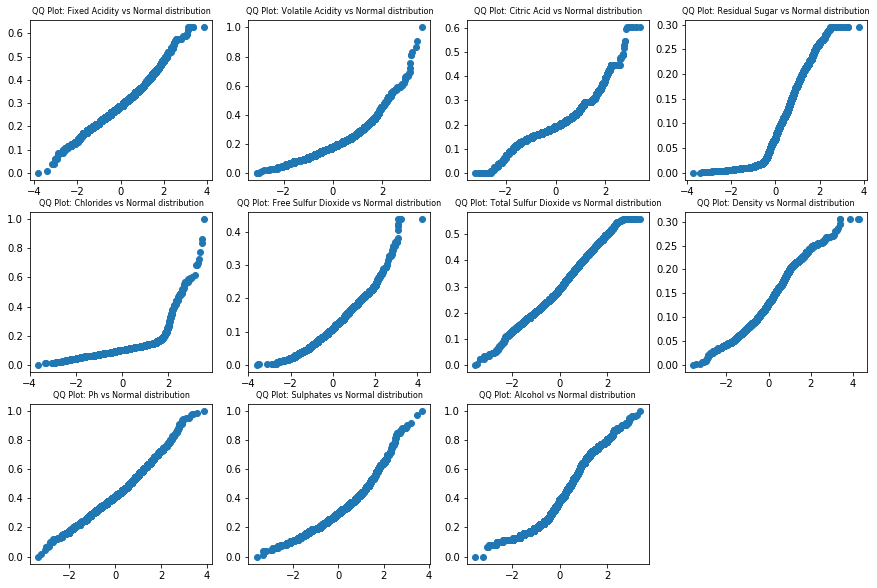

In [50]:
# QQ plots to check for outliers
winsorized_columns = winsorized.columns
number_of_plots = len(winsorized_columns)
current_plot_number = 1
plot_rows = 3

h = plt.figure(figsize=(15, 10))

for variable in winsorized_columns:
    plt.subplot(plot_rows, math.ceil(number_of_plots/plot_rows), current_plot_number)
            
    sorted_vars = winsorized[variable].sort_values()
    normal_distribution = np.random.normal(0, 1, len(winsorized[variable]))
    normal_distribution.sort()
    
    #Create the QQ plot
    plt.plot(normal_distribution, sorted_vars, "o",)
    plt.title("QQ Plot: {} vs Normal distribution".format(variable.title()),fontsize=8)
    
    current_plot_number += 1

These look quite a bit better. Let's see if the model performs better with this new data

In [180]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

from sklearn import metrics

# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X = winsorized

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = lin_reg.fit(Xtrain,Ytrain)
    predictions = lin_reg.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5198037114417108
Standard Deviation of Accuracies: 0.003641432053551185
Mean Root Means Squared Error: 0.7509681415256799
Standard Deviation of Root Means Squared Errors: 0.010132893860188813


Let's additionally try combining the highly correlated variables fo residual sugar and density.

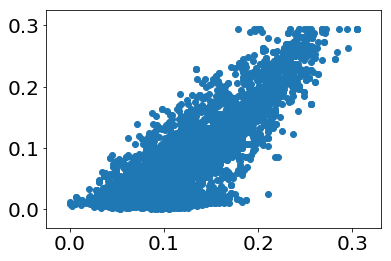

In [181]:
plt.scatter(winsorized['density'],winsorized['residual sugar'])

In [182]:
# Let's try combining the correlated features
means = winsorized[['residual sugar','density']].mean(axis=0)
stds = winsorized[['residual sugar','density']].std(axis=0)
winsorized['density_sugar_combo'] = ((winsorized[['residual sugar','density']] - means) / stds).mean(axis=1)
winsorized['density_sugar_combo'] = min_max_scaler.fit_transform(winsorized[['density_sugar_combo']])

In [183]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

from sklearn import metrics

# Creating our own version of cross validation so that we can calculate our rounded accuracy metric to compare to the classification models
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X = winsorized.drop(['residual sugar','density'],axis=1)

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = lin_reg.fit(Xtrain,Ytrain)
    predictions = lin_reg.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5171496083634515
Standard Deviation of Accuracies: 0.0008969664020180168
Mean Root Means Squared Error: 0.7589879948633199
Standard Deviation of Root Means Squared Errors: 0.011018857836528596


These decreases our accuracy, so let's keep it out.

In [184]:
winsorized = winsorized.drop('density_sugar_combo',axis=1)

In [185]:
#winsorized = winsorized.drop('density_sugar_combo',axis=1)
kf = KFold(n_splits=3,shuffle=True,random_state=11)

lin_reg = linear_model.LinearRegression()

X = winsorized
Y = white['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = lin_reg.fit(Xtrain,Ytrain)
    predictions = lin_reg.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

lin_reg.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5184766599025811
Standard Deviation of Accuracies: 0.002965358975064555
Mean Root Means Squared Error: 0.7549780681944999
Standard Deviation of Root Means Squared Errors: 0.011319226779734275


In [231]:
# Saving the coefficients
lin_reg_coef = pd.DataFrame()
lin_reg_coef['Feature'] = X.columns
lin_reg_coef['Coefficient'] = lin_reg.coef_
lin_reg_coef.sort_values('Coefficient',ascending=False)

,Feature,Coefficient
3,residual sugar,6.711706
0,fixed acidity,1.230536
5,free sulfur dioxide,1.129133
8,pH,0.980310
10,alcohol,0.711785
9,sulphates,0.606658
6,total sulfur dioxide,0.064432
2,citric acid,0.054314
4,chlorides,-0.023266
1,volatile acidity,-1.881321


In [186]:
# Adding this to results df
mvr_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean]
model_results.loc['Linear Regression'] = mvr_addition

In [187]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.003790,0.660271,0.008621,0.693940
Naive Bayes,0.005478,0.448756,0.006650,0.893898
Random Forest,0.005056,0.594529,0.003927,0.752689
Gradient Boosted Classifier,0.007118,0.543080,0.006170,0.802049
SVM Classifier,0.004338,0.503063,0.008253,0.849744
Linear Regression,0.002965,0.518477,0.011319,0.754978


In [466]:
from itertools import permutations
var_pairs = list(permutations(white.drop('quality',axis=1).columns,2))

new_vars_df = white.copy()

for pair in var_pairs:
    div_name_1 = '{} / {}'.format(pair[0],pair[1])
    div_name_2 = '{} / {}'.format(pair[1],pair[0])
    mult_name = '{} * {}'.format(pair[0],pair[1])
    
    new_vars_df[div_name_1] = new_vars_df[pair[0]] / new_vars_df[pair[1]] 
    new_vars_df[div_name_2] = new_vars_df[pair[1]] / new_vars_df[pair[0]]
    new_vars_df[mult_name] = new_vars_df[pair[0]] * new_vars_df[pair[1]]
    
# Replacing infinity values
new_vars_df['quality'] = white['quality']
new_vars_df = new_vars_df.replace([np.inf, -np.inf], np.nan)
new_vars_df = new_vars_df.dropna()

We have a bunch more features, so let's try lasso & ridge regression in order to cope.

In [169]:
new_vars_df.drop('quality',axis=1).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates',
       ...
       'pH / alcohol', 'alcohol / pH', 'pH / quality', 'quality / pH',
       'sulphates / alcohol', 'alcohol / sulphates', 'sulphates / quality',
       'quality / sulphates', 'alcohol / quality', 'quality / alcohol'],
      dtype='object', length=143)

# Ridge

In [502]:
from itertools import permutations
var_pairs = list(permutations(white.drop('quality',axis=1).columns,2))

new_vars_df = white.copy()

for pair in var_pairs:
    div_name_1 = '{} / {}'.format(pair[0],pair[1])
    div_name_2 = '{} / {}'.format(pair[1],pair[0])
    mult_name = '{} * {}'.format(pair[0],pair[1])
    
    new_vars_df[div_name_1] = new_vars_df[pair[0]] / new_vars_df[pair[1]] 
    new_vars_df[div_name_2] = new_vars_df[pair[1]] / new_vars_df[pair[0]]
    new_vars_df[mult_name] = new_vars_df[pair[0]] * new_vars_df[pair[1]]
    
# Replacing infinity values
new_vars_df['quality'] = white['quality']
new_vars_df = new_vars_df.replace([np.inf, -np.inf], np.nan)
new_vars_df = new_vars_df.dropna()

In [502]:
from itertools import permutations
var_pairs = list(permutations(scaled_variables_df.columns,2))

new_vars_df = scaled_variables_df.copy()

for pair in var_pairs:
    div_name_1 = '{} / {}'.format(pair[0],pair[1])
    div_name_2 = '{} / {}'.format(pair[1],pair[0])
    mult_name = '{} * {}'.format(pair[0],pair[1])
    
    new_vars_df[div_name_1] = new_vars_df[pair[0]] / new_vars_df[pair[1]] 
    new_vars_df[div_name_2] = new_vars_df[pair[1]] / new_vars_df[pair[0]]
    new_vars_df[mult_name] = new_vars_df[pair[0]] * new_vars_df[pair[1]]
    
# Replacing infinity values
new_vars_df['quality'] = white['quality']
new_vars_df = new_vars_df.replace([np.inf, -np.inf], np.nan)
new_vars_df = new_vars_df.dropna()

In [503]:
# Optimizing ridge regression
parameters = {'alpha':np.arange(50,210,10)}

from sklearn.linear_model import Ridge

ridge_reg = Ridge()

X = new_vars_df.drop('quality',axis=1)
Y = new_vars_df['quality']

#grid_ridge = GridSearchCV(ridge_reg, parameters,scoring='neg_mean_squared_error')
grid_ridge = GridSearchCV(ridge_reg, parameters,scoring=acc_scorer)
grid_ridge.fit(X,Y)

print('Best parameters for max accuracy:')
print(grid_ridge.best_params_,'\n')

Best parameters for max accuracy:
{'alpha': 160} 



In [520]:
#winsorized = winsorized.drop('density_sugar_combo',axis=1)
kf = KFold(n_splits=3,shuffle=True,random_state=11)

ridge_reg = linear_model.Ridge(alpha=160)

X = new_vars_df.drop('quality',axis=1)
Y = new_vars_df['quality']

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

accuracies = cross_val_score(ridge_reg,X,Y,scoring=acc_scorer,cv=kf)
nmse = cross_val_score(ridge_reg,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5236460522635883
Standard Deviation of Accuracies: 0.011044681561829965
Mean Root Means Squared Error: 0.9172563157594462
Standard Deviation of Root Means Squared Errors: 0.12511184863618577


This doesn't represent any improvement really, since accuracy is slightly up but RMSE is substantially up.

In [521]:
rr_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean,None,None]
model_results.loc['Ridge Regression'] = rr_addition

In [522]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Baseline,NaN,0.448755,NaN,0.885639,0.000000,0.000000
KNN,0.001262,0.663741,0.008758,0.695408,0.214986,-0.214795
Naive Bayes,0.005478,0.448756,0.006650,0.893898,0.000002,0.009326
Random Forest,0.014517,0.668174,0.019478,0.683168,0.219419,-0.228615
Gradient Boosted Classifier,0.005483,0.599304,0.007398,0.753310,0.150549,-0.149416
SVM Classifier,0.010220,0.594795,0.020296,0.780600,0.146040,-0.118602
Linear Regression,0.002965,0.518477,0.011319,0.754978,0.069722,-0.147533
Ridge Regression,0.011045,0.523646,0.125112,0.917256,NaN,NaN
Lasso Regression,0.006403,0.530436,NaN,NaN,0.081681,NaN
SVM Regressor,0.002121,0.550020,0.008560,0.745437,0.101266,-0.158306


# RFC Revisited

Just for kicks seeing how the random forest model works with these...

In [424]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
parameters = {'n_estimators':np.arange(1,50)}

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

# Optimizing random forest classifier for rmse
clf_rf = GridSearchCV(rfc, parameters,scoring='neg_mean_squared_error',cv=kf)
clf_rf.fit(X,Y)

# Evaluating best model by RMSE
print('Best parameters for minimum RMSE:')
print(clf_rf.best_params_,'\n')

# Optimizing random forest classifier for accuracy, printing results
clf_rf = GridSearchCV(rfc, parameters,scoring='accuracy')
clf_rf.fit(X,Y)
print('\n')
print('Best parameters for maximum accuracy:')
print(clf_rf.best_params_,'\n')

Best parameters for minimum RMSE:
{'n_estimators': 42} 

Mean Accuracy: -0.47898495887233
Standard Deviation of Accuracies: 0.030626995572916444
Mean Root Means Squared Error: 0.683934978498138
Standard Deviation of Root Means Squared Errors: 0.023636401126875164


Best parameters for maximum accuracy:
{'n_estimators': 41} 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Mean Accuracy: 0.6689931312343241
Standard Deviation of Accuracies: 0.012456809013614135
Mean Root Means Squared Error: 0.8122406056369448
Standard Deviation of Root Means Squared Errors: 0.005830397766457928


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
parameters = {'n_estimators':np.arange(1,50)}

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

# Optimizing random forest classifier for rmse
clf_rf = GridSearchCV(rfc, parameters,scoring='neg_mean_squared_error',cv=kf)
clf_rf.fit(X,Y)
print('Best parameters for minimum RMSE:')
print(clf_rf.best_params_,'\n')

# Optimizing random forest classifier for accuracy, printing results
clf_rf = GridSearchCV(rfc, parameters,scoring='accuracy',cv=kf)
clf_rf.fit(X,Y)
print('\n')
print('Best parameters for maximum accuracy:')
print(clf_rf.best_params_,'\n')

In [482]:
from sklearn import ensemble

#best_rf_params = clf_rf.best_params_

rfc = ensemble.RandomForestClassifier(n_estimators=41)

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

accuracies = cross_val_score(rfc,X,Y,scoring='accuracy',cv=kf)
nmse = cross_val_score(rfc,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

rfc.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.6681735010343343
Standard Deviation of Accuracies: 0.014516814481928092
Mean Root Means Squared Error: 0.6831681477709042
Standard Deviation of Root Means Squared Errors: 0.01947813757042318


In [473]:
RFC_feats = pd.DataFrame()
RFC_feats['feature'] = X.columns
RFC_feats['importance'] = rfc.feature_importances_
RFC_feats.sort_values('importance',ascending=False)

,feature,importance
228,alcohol * density,0.014738
192,density / alcohol,0.013782
193,alcohol / density,0.013594
229,alcohol * pH,0.013308
10,alcohol,0.011868
194,density * alcohol,0.010821
208,pH * alcohol,0.010598
67,alcohol / volatile acidity,0.010275
66,volatile acidity / alcohol,0.010249
206,pH / alcohol,0.008191


A noticeable improvement. Let's add this new version to our results DF..

In [483]:
rf_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean,None,None]
model_results.loc['Random Forest'] = rf_addition

In [484]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Baseline,NaN,0.448755,NaN,0.885639,0.000000,0.000000
KNN,0.001262,0.663741,0.008758,0.695408,0.214986,-0.214795
Naive Bayes,0.005478,0.448756,0.006650,0.893898,0.000002,0.009326
Random Forest,0.014517,0.668174,0.019478,0.683168,NaN,NaN
Gradient Boosted Classifier,0.005483,0.599304,0.007398,0.753310,NaN,NaN
SVM Classifier,0.010220,0.594795,0.020296,0.780600,NaN,NaN
Linear Regression,0.002965,0.518477,0.011319,0.754978,0.069722,-0.147533
Ridge Regression,0.000947,0.517934,0.009575,0.689207,0.069179,-0.221797
Lasso Regression,0.009736,0.449477,0.009575,0.689207,0.000722,-0.221797
SVM Regressor,0.002121,0.550020,0.008560,0.745437,0.101266,-0.158306


# Lasso

In [495]:
new_vars_df.drop('quality',axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,alcohol * fixed acidity,alcohol * volatile acidity,alcohol * citric acid,alcohol * residual sugar,alcohol * chlorides,alcohol * free sulfur dioxide,alcohol * total sulfur dioxide,alcohol * density,alcohol * pH,alcohol * sulphates
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,...,61.600,2.376000,3.168000,182.160,0.396000,396.000000,1496.000000,8.808800,26.4000,3.960000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,...,59.850,2.850000,3.230000,15.200,0.465500,133.000000,1254.000000,9.443000,31.3500,4.655000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,...,81.810,2.828000,4.040000,69.690,0.505000,303.000000,979.700000,10.050510,32.9260,4.444000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,...,71.280,2.277000,3.168000,84.150,0.574200,465.300000,1841.400000,9.856440,31.5810,3.960000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,...,71.280,2.277000,3.168000,84.150,0.574200,465.300000,1841.400000,9.856440,31.5810,3.960000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,...,81.810,2.828000,4.040000,69.690,0.505000,303.000000,979.700000,10.050510,32.9260,4.444000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,...,59.520,3.072000,1.536000,67.200,0.432000,288.000000,1305.600000,9.551040,30.5280,4.512000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,...,61.600,2.376000,3.168000,182.160,0.396000,396.000000,1496.000000,8.808800,26.4000,3.960000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,...,59.850,2.850000,3.230000,15.200,0.465500,133.000000,1254.000000,9.443000,31.3500,4.655000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,...,89.100,2.420000,4.730000,16.500,0.484000,308.000000,1419.000000,10.931800,35.4200,4.950000


In [528]:
# Optimizing lasso regression
parameters = {'alpha':np.arange(1,20,1)}

from sklearn.linear_model import Lasso

lasso_reg = Lasso(max_iter=10000)

X = new_vars_df.drop('quality',axis=1)
Y = new_vars_df['quality']

grid_lasso = GridSearchCV(lasso_reg, parameters,scoring='neg_mean_squared_error')
grid_lasso.fit(X,Y)

print('Best parameters for minimum RMSE:')
print(grid_lasso.best_params_,'\n')

grid_lasso = GridSearchCV(lasso_reg, parameters,scoring=acc_scorer,cv=kf)
grid_lasso.fit(X,Y)

print('Best parameters for max accuracy:')
print(grid_lasso.best_params_,'\n')

Best parameters for minimum RMSE:
{'alpha': 2} 

Best parameters for max accuracy:
{'alpha': 1} 



In [531]:
#winsorized = winsorized.drop('density_sugar_combo',axis=1)
kf = KFold(n_splits=3,shuffle=True,random_state=11)

lasso_reg = linear_model.Lasso(alpha=2)

X = new_vars_df.drop('quality',axis=1)
Y = new_vars_df['quality']

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

accuracies = cross_val_score(lasso_reg,X,Y,scoring=acc_scorer,cv=kf)
nmse = cross_val_score(lasso_reg,X,Y,scoring='neg_mean_squared_error',cv=kf)
rmse = np.sqrt(np.abs(nmse))

mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse.std()
rmse_mean = rmse.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.4494281411792866
Standard Deviation of Accuracies: 0.013261553151499343
Mean Root Means Squared Error: 0.8826892259934459
Standard Deviation of Root Means Squared Errors: 0.006772073520552091


In [532]:
lr_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean,None,None]
model_results.loc['Lasso Regression'] = lr_addition

#### Observation on lasso & ridge: these don't seem to improve our performance, so let's try something else.

# SVM Regression

In [31]:
def accuracy_func(true,pred):
    return metrics.accuracy_score(true,np.round(pred))

acc_scorer = metrics.make_scorer(accuracy_func, greater_is_better=True, needs_proba=False, needs_threshold=False)

In [32]:
# Enforcing some normality on variables via mathematical operations
modified_feat = pd.DataFrame()
modified_feat[['residual sugar','fixed acidity','pH','alcohol','density','total sulfur dioxide']] = white[['residual sugar','fixed acidity','pH','alcohol','density','total sulfur dioxide']]
modified_feat['volatile acidity squared'] = np.log(white['volatile acidity'])
modified_feat['citric acid sqrt'] = np.sqrt(white['citric acid'])
modified_feat['chlorides log10'] = np.log10(white['chlorides'])
modified_feat['free sulfur dioxide sqrt'] =  np.sqrt(white['free sulfur dioxide'])
modified_feat['sulphates sqrt'] =  np.sqrt(white['sulphates'])

In [221]:
# Optimizing SVM regression
parameters = {'C':np.arange(0.1,2,0.1),'epsilon':[0.01,0.009,0.005,0.02,0.03,0.04,0.05,0.06,0.07]}

svr = svm.SVR()

X = modified_feat
Y = white['quality']

grid_svr = GridSearchCV(svr, parameters,scoring=acc_scorer, cv=kf)
grid_svr.fit(X,Y)

print('Best parameters for minimum RMSE:')
print(grid_svr.best_params_,'\n')

Best parameters for minimum RMSE:
{'C': 1.8000000000000003, 'epsilon': 0.06} 



In [ ]:
# Optimizing SVM regression
parameters = {'C':np.arange(0.1,2,0.1),'epsilon':[0.01,0.009,0.005,0.02,0.03,0.04,0.05,0.06,0.07]}

svr = svm.SVR(**parameters)

X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']

grid_svr = GridSearchCV(svr, parameters,scoring=acc_scorer, cv=kf)
grid_svr.fit(X,Y)

print('Best parameters for minimum RMSE:')
print(grid_svr.best_params_,'\n')

In [101]:
predictions = cross_val_predict(grid_svr,X,Y)
rounded_predictions = np.round(predictions)
accuracy = metrics.accuracy_score(np.round(predictions),Y)
nmse = cross_val_score(grid_svr,X,Y,scoring='neg_mean_squared_error')
rmse = np.sqrt(np.abs(nmse))
print('Mean Accuracy: {}'.format(accuracy))
#print('Standard Deviation of Accuracies: {}'.format(accuracies.std()))
print('Mean Root Means Squared Error: {}'.format(rmse.mean()))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse.std()))

Mean Accuracy: 0.46733360555328707
Mean Root Means Squared Error: 0.8240177060833278
Standard Deviation of Root Means Squared Errors: 0.05268259088369682


In [228]:
# Saving resulting params if you don't want to rerun the above
#best_svr_params = grid_svr.best_params_
#best_svr_params = {'C': 0.30000000000000004, 'epsilon': 0.1} 
{'C': 1.8000000000000003, 'epsilon': 0.06}  

svr = svm.SVR()#**best_svr_params)

kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X = modified_feat
Y = white['quality']

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = svr.fit(Xtrain,Ytrain)
    predictions = svr.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

svr.fit(X,Y)

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5500202122081738
Standard Deviation of Accuracies: 0.002121454936581394
Mean Root Means Squared Error: 0.7454369945298412
Standard Deviation of Root Means Squared Errors: 0.008560414611162593


In [224]:
# Adding this to results df
svm_reg_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean]
model_results.loc['SVM Regressor'] = svm_reg_addition

In [225]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.003790,0.660271,0.008621,0.693940
Naive Bayes,0.005478,0.448756,0.006650,0.893898
Random Forest,0.008960,0.634559,0.019236,0.738758
Gradient Boosted Classifier,0.007118,0.543080,0.006170,0.802049
SVM Classifier,0.004338,0.503063,0.008253,0.849744
Linear Regression,0.002965,0.518477,0.011319,0.754978
Ridge Regression,0.000947,0.517934,0.011319,0.754978
Lasso Regression,0.009736,0.449477,0.011319,0.754978
SVM Regressor,0.002121,0.550020,0.008560,0.745437


# Gradient Boosted Regression

In [234]:
# Optimizing gradient boosted regression
parameters = {'learning_rate':np.arange(0.1,1,0.1),'n_estimators':np.arange(20,60,5),'max_depth':np.arange(1,5,1)}

gbr = ensemble.GradientBoostingRegressor()

X = modified_feat
Y = white['quality']

grid_gbr = GridSearchCV(gbr, parameters,scoring='neg_mean_squared_error')
grid_gbr.fit(X,Y)

print('Best parameters for minimum RMSE:')
print(grid_gbr.best_params_,'\n')
predictions = cross_val_predict(grid_gbr,scaled_variables_df,white['quality'])
rounded_predictions = np.round(predictions)
accuracy = metrics.accuracy_score(np.round(predictions),Y)
nmse = cross_val_score(grid_gbr,scaled_variables_df,white['quality'],scoring=acc_scorer)
rmse = np.sqrt(np.abs(nmse))
print('Mean Accuracy: {}'.format(accuracy))
#print('Standard Deviation of Accuracies: {}'.format(accuracies.std()))
print('Mean Root Means Squared Error: {}'.format(rmse.mean()))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse.std()))

Best parameters for minimum RMSE:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40} 

Mean Accuracy: 0.5210289914250714
Mean Root Means Squared Error: 0.7209801236225571
Standard Deviation of Root Means Squared Errors: 0.014124393468058808


In [370]:
# Optimizing gradient boosted regression
parameters = {'learning_rate':[0.09,0.1,0.08,0.07,0.06,0.05,0.04,0.03],
              'n_estimators':np.arange(30,60,10),
             }#'max_depth':np.arange(1,5,1)}

gbr = ensemble.GradientBoostingRegressor()

X = modified_feat
Y = white['quality']

grid_gbr = GridSearchCV(gbr, parameters,scoring=acc_scorer,cv=kf)
grid_gbr.fit(X,Y)

print('Best parameters for minimum RMSE:')
print(grid_gbr.best_params_,'\n')

Best parameters for minimum RMSE:
{'learning_rate': 0.1, 'n_estimators': 50} 



In [ ]:
predictions = cross_val_predict(grid_gbr,X,Y)
rounded_predictions = np.round(predictions)
accuracy = metrics.accuracy_score(np.round(predictions),Y)
nmse = cross_val_score(grid_gbr,X,Y,scoring=acc_scorer)
rmse = np.sqrt(np.abs(nmse))
print('Mean Accuracy: {}'.format(accuracy))
#print('Standard Deviation of Accuracies: {}'.format(accuracies.std()))
print('Mean Root Means Squared Error: {}'.format(rmse.mean()))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse.std()))

In [371]:
#best_gbr_params = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50} 

gbr = ensemble.GradientBoostingRegressor(**best_gbr_params)

kf = KFold(n_splits=3,shuffle=True,random_state=11)

accuracies, rmse_scores = (np.array([]) for i in range(2))

X = modified_feat

for train, test in kf.split(X):
   
    # split training and test sets
    Xtrain = X.iloc[train,:]
    Ytrain = Y[train]
    
    Xtest = X.iloc[test,:]
    Ytest = Y[test]
    
    # Create model
    model = gbr.fit(Xtrain,Ytrain)
    predictions = gbr.predict(Xtest)
    
    # Calculate RMSE & accuracy
    rmse = np.sqrt(metrics.mean_squared_error(predictions,Ytest))
    rmse_scores = np.append(rmse,rmse_scores)
    
    rounded_predictions = np.round(predictions)
    accuracy = metrics.accuracy_score(np.round(predictions),Ytest)
    accuracies = np.append(accuracy,accuracies)
    
mean_accuracy = accuracies.mean()
accuracy_std = accuracies.std()
rmse_std = rmse_scores.std()
rmse_mean = rmse_scores.mean()

print('Mean Accuracy: {}'.format(mean_accuracy))
print('Standard Deviation of Accuracies: {}'.format(accuracy_std))
print('Mean Root Means Squared Error: {}'.format(rmse_mean))
print('Standard Deviation of Root Means Squared Errors: {}'.format(rmse_std))

Mean Accuracy: 0.5616559902180916
Standard Deviation of Accuracies: 0.006379851479618962
Mean Root Means Squared Error: 0.6955057299238421
Standard Deviation of Root Means Squared Errors: 0.007325056931830248


In [234]:
# Adding this to results df
gb_reg_addition = [accuracy_std, mean_accuracy, rmse_std, rmse_mean]
model_results.loc['Gradient Boosted Regressor'] = gb_reg_addition

In [235]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.003790,0.660271,0.008621,0.693940
Naive Bayes,0.005478,0.448756,0.006650,0.893898
Random Forest,0.008960,0.634559,0.019236,0.738758
Gradient Boosted Classifier,0.007118,0.543080,0.006170,0.802049
SVM Classifier,0.004338,0.503063,0.008253,0.849744
Linear Regression,0.002965,0.518477,0.011319,0.754978
Ridge Regression,0.000947,0.517934,0.011319,0.754978
Lasso Regression,0.009736,0.449477,0.011319,0.754978
SVM Regressor,0.002121,0.550020,0.008560,0.745437


# Performance vs. Red Wine Dataset

#### Baseline Accuracy

In [374]:
red_base_accuracy = red['quality'].value_counts().iloc[0]/red['quality'].value_counts().sum()
print('base_accuracy: {}'.format(red_base_accuracy))

# Since we're assuming an unbiased estimator, RMSE = STD of distribution
red_base_rmse = red['quality'].std()
print('base_rmse: {}'.format(red_base_rmse))

base_accuracy: 0.425891181988743
base_rmse: 0.8075694397347023


#### KNN

In [375]:
KNNC.fit(scaled_variables_df, white['quality'])
red_scaled = pd.DataFrame(min_max_scaler.fit_transform(red.drop('quality',axis=1)))
predictions = KNNC.predict(red_scaled)
KNN_red_accuracy = metrics.accuracy_score(predictions,red['quality'])
KNN_red_rmse = np.sqrt(metrics.mean_squared_error(predictions,red['quality']))
print('Accuracy: {}'.format(KNN_red_accuracy))
print('RMSE: {}'.format(KNN_red_rmse))

Accuracy: 0.5272045028142589
RMSE: 0.8025911757377523


#### RFC

In [496]:
var_pairs = list(permutations(red.drop('quality',axis=1).columns,2))

new_vars_df_red = red.copy()

for pair in var_pairs:
    div_name_1 = '{} / {}'.format(pair[0],pair[1])
    div_name_2 = '{} / {}'.format(pair[1],pair[0])
    mult_name = '{} * {}'.format(pair[0],pair[1])
    
    new_vars_df_red[div_name_1] = new_vars_df_red[pair[0]] / new_vars_df_red[pair[1]] 
    new_vars_df_red[div_name_2] = new_vars_df_red[pair[1]] / new_vars_df_red[pair[0]]
    new_vars_df_red[mult_name] = new_vars_df_red[pair[0]] * new_vars_df_red[pair[1]]
    
# Replacing infinity values
new_vars_df_red['quality'] = red['quality']
new_vars_df_red = new_vars_df_red.replace([np.inf, -np.inf], np.nan)
new_vars_df_red = new_vars_df_red.dropna()

In [497]:
X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']
rfc.fit(X,Y)

predictions = rfc.predict(new_vars_df_red.drop('quality',axis=1))

RFC_red_accuracy = metrics.accuracy_score(predictions,new_vars_df_red['quality'])
RFC_red_rmse = np.sqrt(metrics.mean_squared_error(predictions,new_vars_df_red['quality']))
print('Accuracy: {}'.format(RFC_red_accuracy))
print('RMSE: {}'.format(RFC_red_rmse))

Accuracy: 0.2937968643490116
RMSE: 1.3181652572932976


#### Multivariate Regression

In [388]:
predictions = lin_reg.predict(red_scaled)
lin_reg_red_accuracy = metrics.accuracy_score(np.round(predictions),red['quality'])
lin_reg_red_rmse = np.sqrt(metrics.mean_squared_error(predictions,red['quality']))
print('Accuracy: {}'.format(lin_reg_red_accuracy))
print('RMSE: {}'.format(lin_reg_red_rmse))

Accuracy: 0.010631644777986242
RMSE: 4.043794083839098


#### SVM Regression

In [389]:
# Enforcing some normality on variables via mathematical operations
modified_feat_red = pd.DataFrame()
modified_feat_red[['residual sugar','fixed acidity','pH','alcohol','density','total sulfur dioxide']] = red[['residual sugar','fixed acidity','pH','alcohol','density','total sulfur dioxide']]
modified_feat_red['volatile acidity squared'] = np.log(red['volatile acidity'])
modified_feat_red['citric acid sqrt'] = np.sqrt(red['citric acid'])
modified_feat_red['chlorides log10'] = np.log10(red['chlorides'])
modified_feat_red['free sulfur dioxide sqrt'] =  np.sqrt(red['free sulfur dioxide'])
modified_feat_red['sulphates sqrt'] =  np.sqrt(red['sulphates'])

In [390]:
predictions = svr.predict(modified_feat_red)
svr_red_accuracy = metrics.accuracy_score(np.round(predictions),red['quality'])
svr_red_rmse = np.sqrt(metrics.mean_squared_error(predictions,red['quality']))
print('Accuracy: {}'.format(svr_red_accuracy))
print('RMSE: {}'.format(svr_red_rmse))

Accuracy: 0.45590994371482174
RMSE: 0.8413379193282471


#### Gradient Boosted Regression

In [391]:
predictions = gbr.predict(modified_feat_red)
gbr_red_accuracy = metrics.accuracy_score(np.round(predictions),red['quality'])
gbr_red_rmse = np.sqrt(metrics.mean_squared_error(predictions,red['quality']))
print('Accuracy: {}'.format(gbr_red_accuracy))
print('RMSE: {}'.format(gbr_red_rmse))

Accuracy: 0.34834271419637275
RMSE: 1.1667236211760903


In [392]:
#result_dict = {'KNN':KNN_red_accuracy, 'Random Forest Classifier':RFC_red_accuracy, 'Linear Regression':lin_reg_red_accuracy, 'SVM Regression':svr_red_accuracy, 'GBR Regression':gbr_red_accuracy}

results = np.array([KNN_red_accuracy,RFC_red_accuracy, lin_reg_red_accuracy, svr_red_accuracy, gbr_red_accuracy])

red_wine_accuracies = pd.DataFrame(results,index=['KNN','Random Forest Classifier','Multivariate Linear Regression','SVM Regression','Gradient Boosted Regression'])

In [393]:
# This list will become our row names.
models = ['KNN','Random Forest Classifier','Multivariate Linear Regression','SVM Regression','Gradient Boosted Regression']

# Create an empty data frame with named rows.
red_wine_model_accuracies = pd.DataFrame(index=models)

# Add our columns to the data frame one at a time.
red_wine_model_accuracies['Accuracy'] = [KNN_red_accuracy,RFC_red_accuracy, lin_reg_red_accuracy, svr_red_accuracy, gbr_red_accuracy]
red_wine_model_accuracies['RMSE'] = [KNN_red_rmse,RFC_red_rmse, lin_reg_red_rmse, svr_red_rmse, gbr_red_rmse]

In [394]:
red_wine_model_accuracies

,Accuracy,RMSE
KNN,0.527205,0.802591
Random Forest Classifier,0.351057,1.201850
Multivariate Linear Regression,0.010632,4.043794
SVM Regression,0.455910,0.841338
Gradient Boosted Regression,0.348343,1.166724


In [395]:
sorted_red_accuracies

,Accuracy,RMSE
Random Forest Classifier,0.557223,0.756461
KNN,0.527205,0.802591
SVM Regression,0.455910,0.841338
Gradient Boosted Regression,0.320826,1.156783
Multivariate Linear Regression,0.010632,4.043794


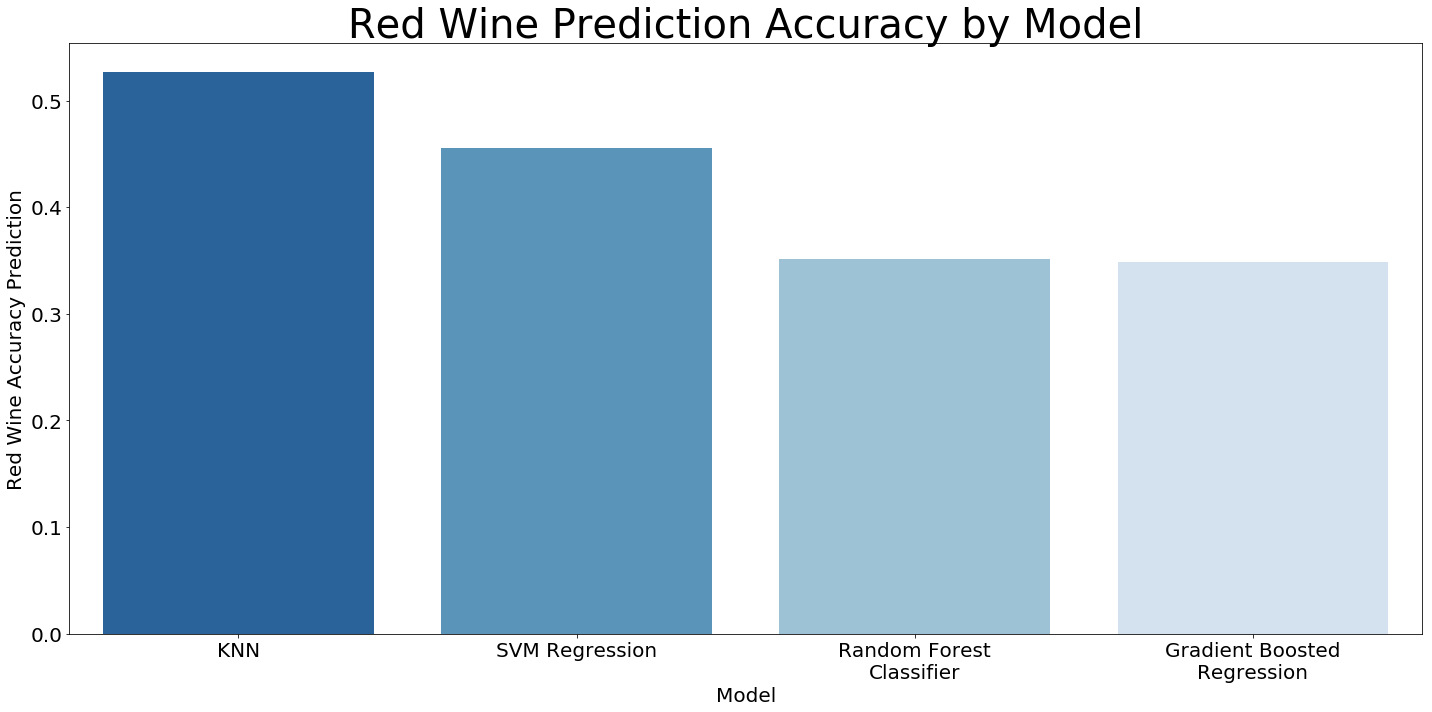

In [422]:
sorted_red_accuracies = red_wine_model_accuracies.sort_values('Accuracy',ascending=False)
sorted_red_accuracies = sorted_red_accuracies.drop('Multivariate Linear Regression',axis=0)

from textwrap import wrap
labels = sorted_red_accuracies.index
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]

plt.figure(figsize=(20,10))
sns.barplot(labels,sorted_red_accuracies['Accuracy'],palette='Blues_r')
plt.labels = (sorted_red_accuracies.index)
plt.xlabel("Model",fontsize=20)
plt.ylabel("Red Wine Accuracy Prediction",fontsize=20)
plt.title("Red Wine Prediction Accuracy by Model",fontsize=40)
plt.tick_params(labelsize=20)
#plt.set_xticklabels(fontsize=16)
#plt.set_yticklabels(fontsize=16)
plt.tight_layout()
plt.savefig("redwineaccuracy")
plt.show()

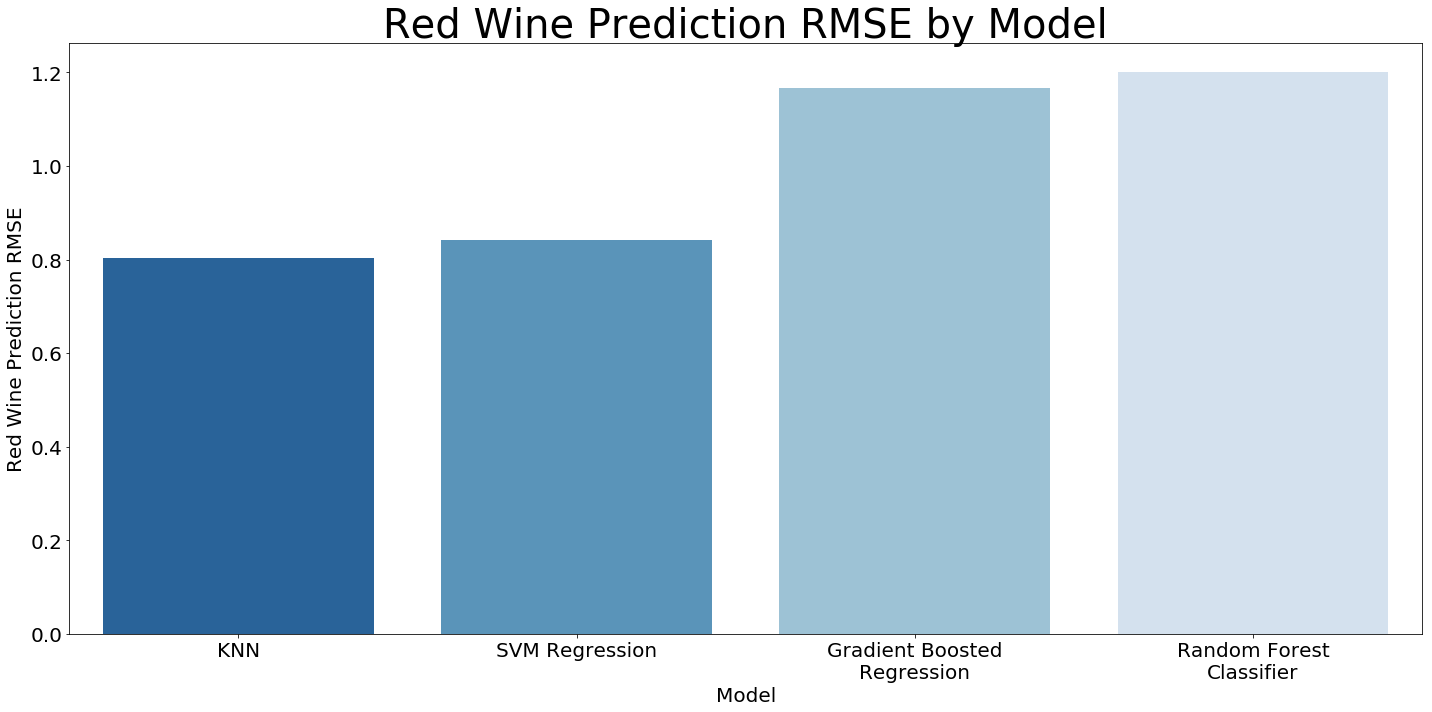

In [423]:
sorted_red_accuracies = red_wine_model_accuracies.sort_values('RMSE',ascending=True)
sorted_red_accuracies = sorted_red_accuracies.drop('Multivariate Linear Regression',axis=0)

from textwrap import wrap
labels = sorted_red_accuracies.index
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]

plt.figure(figsize=(20,10))
sns.barplot(labels,sorted_red_accuracies['RMSE'],palette='Blues_r')
plt.labels = (sorted_red_accuracies.index)
plt.xlabel("Model",fontsize=20)
plt.ylabel("Red Wine Prediction RMSE",fontsize=20)
plt.title("Red Wine Prediction RMSE by Model",fontsize=40)
plt.tick_params(labelsize=20)
#plt.set_xticklabels(fontsize=16)
#plt.set_yticklabels(fontsize=16)
plt.tight_layout()
plt.savefig("redwineaccuracy")
plt.show()

# Testing Some Additional Metrics
We've spent the bulk of the exercise analyzing how well each model performs in terms of certain summary metrics (accuracy & RMSE). However, another thing to take note of could be how well each model predicts certain values. This gives us a better idea of what the model is doing and what situations it may or may not be useful in. For example, a model that is highly accurate but sticks very close to the mode for all predictions wouldn't be very useful for trying to identify "great wine" or "very bad wine" outliers in the dataset.

In [417]:
# KNN
KNNC = KNeighborsClassifier(n_neighbors=101,weights='distance')
pred = cross_val_predict(KNNC,scaled_variables_df,white['quality'],cv=kf)

knn_crosstab = pd.crosstab(pred,white['quality'])
del knn_crosstab.index.name
knn_crosstab

quality,3,4,5,6,7,8,9
4,0,18,0,0,0,0,0
5,8,64,939,279,14,1,0
6,12,78,503,1811,441,73,3
7,0,3,15,108,425,43,2
8,0,0,0,0,0,58,0


In [418]:
# RFC
X, Y = new_vars_df.drop('quality',axis=1),new_vars_df['quality']
pred = cross_val_predict(rfc,X,Y,cv=kf)

rfc_crosstab = pd.crosstab(pred,Y)
del rfc_crosstab.index.name
rfc_crosstab
#pd.crosstab(rfc.predict(scaled_variables_df),white['quality'])

quality,3,4,5,6,7,8,9
4,0,29,14,4,0,0,0
5,8,86,990,331,19,4,0
6,12,42,429,1703,409,62,2
7,0,0,18,149,444,46,3
8,0,0,1,3,8,63,0


In [359]:
# SVM Classifier
X = scaled_variables_df
Y = white['quality']
pred = cross_val_predict(svc,X,Y,cv=kf)

svc_crosstab = pd.crosstab(pred,Y)
del svc_crosstab.index.name
svc_crosstab

quality,3,4,5,6,7,8,9
5,6,73,554,288,26,12,0
6,14,90,903,1910,854,163,5


In [360]:
metrics.accuracy_score(svc.predict(X),Y)

0.51531237239689665

In [361]:
# GB Classifier
X = scaled_variables_df
Y = white['quality']
pred = cross_val_predict(gbc,X,Y,cv=kf)

gb_crosstab = pd.crosstab(pred,Y)
del gb_crosstab.index.name
gb_crosstab

quality,3,4,5,6,7,8,9
3,1,3,7,4,0,0,0
4,4,15,7,7,1,1,0
5,5,91,812,414,43,0,0
6,9,53,622,1647,649,120,2
7,1,1,9,124,185,54,3
8,0,0,0,2,2,0,0


In [362]:
# Multivar regression
X = winsorized
Y = white['quality']
pred = cross_val_predict(lin_reg,X,Y,cv=kf)
rounded_pred = np.round(pred)
linreg_crosstab = pd.crosstab(rounded_pred,Y)
del linreg_crosstab.index.name
linreg_crosstab

quality,3,4,5,6,7,8,9
4.0,2,6,4,0,0,0,0
5.0,6,88,600,295,32,1,0
6.0,11,68,839,1710,618,111,1
7.0,1,1,14,193,230,63,4


In [364]:
# SVM Regression
X = modified_feat
Y = white['quality']
pred = cross_val_predict(svr,X,Y,cv=kf)
rounded_pred = np.round(pred)
svr_crosstab = pd.crosstab(rounded_pred,Y)
del svr_crosstab.index.name
svr_crosstab

quality,3,4,5,6,7,8,9
4.0,0,0,3,0,0,0,0
5.0,6,92,750,373,49,3,0
6.0,14,70,672,1630,517,100,4
7.0,0,1,32,194,314,72,1
8.0,0,0,0,1,0,0,0


In [372]:
# GB Regression
X = modified_feat
Y = white['quality']
pred = cross_val_predict(gbr,X,Y,cv=kf)
rounded_pred = np.round(pred)
gbr_crosstab = pd.crosstab(rounded_pred,Y)
del gbr_crosstab.index.name
gbr_crosstab

quality,3,4,5,6,7,8,9
4.0,0,4,4,0,0,0,0
5.0,11,116,787,358,19,2,0
6.0,9,41,648,1642,545,76,1
7.0,0,2,18,198,316,97,4


In [258]:
model_results.to_csv("model_results.csv")

In [259]:
model_results

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE
Baseline,NaN,0.448755,NaN,0.885639
KNN,0.003790,0.660271,0.008621,0.693940
Naive Bayes,0.005478,0.448756,0.006650,0.893898
Random Forest,0.008960,0.634559,0.019236,0.738758
Gradient Boosted Classifier,0.007118,0.543080,0.006170,0.802049
SVM Classifier,0.004338,0.503063,0.008253,0.849744
Linear Regression,0.002965,0.518477,0.011319,0.754978
Ridge Regression,0.000947,0.517934,0.011319,0.754978
Lasso Regression,0.009736,0.449477,0.011319,0.754978
SVM Regressor,0.002121,0.550020,0.008560,0.745437


In [284]:
model_results = model_results.drop(['Accuracy Improvement Over Baseline','RMSE % Reduction vs Baseline'],axis=1)

In [533]:
# Adding improvements over baseline
model_results['Accuracy Improvement'] = model_results['Mean Accuracy'] - model_results.loc['Baseline','Mean Accuracy']
model_results['RMSE % Reduction'] = (model_results['RMSE']/model_results.loc['Baseline','RMSE']) - 1

In [534]:
model_results_pretty = model_results.round(3)
model_results_pretty.columns = model_results_pretty.columns.str.wrap(12)
model_results_pretty.sort_values('Mean\nAccuracy',ascending=False)

,Accuracy Std Dev,Mean Accuracy,RMSE Std Dev,RMSE,Accuracy Improvement,RMSE % Reduction
Random Forest,0.015,0.668,0.019,0.683,0.219,-0.229
KNN,0.001,0.664,0.009,0.695,0.215,-0.215
Gradient Boosted Classifier,0.005,0.599,0.007,0.753,0.151,-0.149
SVM Classifier,0.010,0.595,0.020,0.781,0.146,-0.119
Gradient Boosted Regressor,0.010,0.565,0.010,0.689,0.116,-0.222
SVM Regressor,0.002,0.550,0.009,0.745,0.101,-0.158
Ridge Regression,0.011,0.524,0.125,0.917,0.075,0.036
Linear Regression,0.003,0.518,0.011,0.755,0.070,-0.148
Baseline,NaN,0.449,NaN,0.886,0.000,0.000
Naive Bayes,0.005,0.449,0.007,0.894,0.000,0.009


# Thoughts on Models
- Based on our key metrics of accuracy and RMSE in the white wine dataset, the superior model is the random forest classifier.
    - This model represents about a 22% improvement in accuracy vs. the baseline model and a -23% reduction in RMSE.
    - Outlier treatment?
- KNN also performs quite well, and these classifiers outperform all of the regressions.
- In general, it's important to note that even our best models are not able to do much better than 66% accuracy. Though this is an appreciable improvement over the baseline, we're far from being able to say that we can confidently predict quality based on these metrics alone. Weaknesses include:
    - Not being able to identify 9s, and in general the models being reticent to predict outlier values. 
    - More advanced feature selection could possibly unearth more predictive power
    - Other data could be brought in to bolster the model
- Interestingly, it is the classifiers that again work much better when using the models to predict red wine quality. Regressor performance in this case plummets.